In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# data
import pandas as pd
import numpy as np
import datetime
from math import ceil

# plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# processing
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.base import clone

#Normalizing 
from sklearn.preprocessing import RobustScaler


# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from pprint import pprint
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,  RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix


# multidimensional visualization methods
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Always display all columns
pd.set_option('display.max_columns', None)
# read the dataset
df = pd.read_csv('/content/drive/My Drive/H2.csv')

# Data Understanding: 

### Data Exploration
- view the original dataset
- Who are our customers, what is therir general behavior?

In [ ]:
# first rows - view the structure
df.head(25)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0            0         6             2015             July   
1            1        88             2015             July   
2            1        65             2015             July   
3            1        92             2015             July   
4            1       100             2015             July   
5            1        79             2015             July   
6            0         3             2015             July   
7            1        63             2015             July   
8            1        62             2015             July   
9            1        62             2015             July   
10           0        43             2015             July   
11           0        43             2015             July   
12           0        43             2015             July   
13           0         4             2015             July   
14           1        43             2015             July   
15           0        43             2015             July   
16           1        43             2015             July   
17           0        43             2015             July   
18           0        43             2015             July   
19           1        43             2015             July   
20           1        43             2015             July   
21           1        97             2015             July   
22           0        43             2015             July   
23           0        43             2015             July   
24           1        80             2015             July   

    ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                      27                      1                     0   
1                      27                      1                     0   
2                      27                      1                     0   
3                      27                      1                     2   
4                      27                      2                     0   
5                      27                      2                     0   
6                      27                      2                     0   
7                      27                      2                     1   
8                      27                      2                     2   
9                      27                      2                     2   
10                     27                      3                     0   
11                     27                      3                     0   
12                     27                      3                     0   
13                     27                      3                     0   
14                     27                      3                     0   
15                     27                      3                     0   
16                     27                      3                     0   
17                     27                      3                     0   
18                     27                      3                     0   
19                     27                      3                     0   
20                     27                      3                     0   
21                     27                      3                     0   
22                     27                      3                     0   
23                     27                      3                     0   
24                     27                      3                     1   

    StaysInWeekNights  Adults  Children  Babies       Meal Country  \
0                   2       1       0.0       0  HB            PRT   
1                   4       2       0.0       0  BB            PRT   
2                   4       1       0.0       0  BB            PRT   
3                   4       2       0.0       0  BB            PRT   
4                   2       2       0.0       0  BB            PRT   
5                   3       2       0.0       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [ ]:
# the dataset has a few null values ('Children' and 'Country') upon initial inspection
df[df.Children.isna()]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
540            1         2             2015           August   
607            1         1             2015           August   
619            1         1             2015           August   
1100           1         8             2015           August   

      ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
540                      32                      3                     1   
607                      32                      5                     0   
619                      32                      5                     0   
1100                     33                     13                     2   

      StaysInWeekNights  Adults  Children  Babies       Meal Country  \
540                   0       2       NaN       0  BB            PRT   
607                   2       2       NaN       0  BB            PRT   
619                   2       3       NaN       0  BB            PRT   
1100                  5       2       NaN       0  BB            PRT   

     MarketSegment DistributionChannel  IsRepeatedGuest  \
540      Undefined           Undefined                0   
607         Direct           Undefined                0   
619      Undefined           Undefined                0   
1100     Online TA           Undefined                0   

      PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
540                       0                            0  B                  
607                       0                            0  B                  
619                       0                            0  B                  
1100                      0                            0  B                  

      AssignedRoomType  BookingChanges      DepositType        Agent  \
540   B                              0  No Deposit              NULL   
607   B                              0  No Deposit                14   
619   B                              0  No Deposit              NULL   
1100  B                              0  No Deposit                 9   

          Company  DaysInWaitingList     CustomerType   ADR  \
540          NULL                  0  Transient-Party  12.0   
607          NULL                  0  Transient-Party  12.0   
619          NULL                  0  Transient-Party  18.0   
1100         NULL                  0  Transient-Party  76.5   

      RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus  \
540                          0                       1          Canceled   
607                          0                       1          Canceled   
619                          0                       2          Canceled   
1100                         0                       1          Canceled   

     ReservationStatusDate  
540             2015-08-01  
607             2015-08-04  
619             2015-08-04  
1100            2015-08-09

In [ ]:
#Company: ID of the company/entity that made the booking or responsible for paying the booking
#Missing values may indicate that the reservation was made by an individual

In [ ]:
df.describe().T

count         mean         std     min     25%  \
IsCanceled                   79330.0     0.417270    0.493111     0.0     0.0   
LeadTime                     79330.0   109.735724  110.948526     0.0    23.0   
ArrivalDateYear              79330.0  2016.174285    0.699181  2015.0  2016.0   
ArrivalDateWeekNumber        79330.0    27.177449   13.398523     1.0    17.0   
ArrivalDateDayOfMonth        79330.0    15.786625    8.728451     1.0     8.0   
StaysInWeekendNights         79330.0     0.795185    0.885026     0.0     0.0   
StaysInWeekNights            79330.0     2.182957    1.456416     0.0     1.0   
Adults                       79330.0     1.850977    0.509292     0.0     2.0   
Children                     79326.0     0.091370    0.372177     0.0     0.0   
Babies                       79330.0     0.004941    0.084323     0.0     0.0   
IsRepeatedGuest              79330.0     0.025615    0.157983     0.0     0.0   
PreviousCancellations        79330.0     0.079743    0.415472     0.0     0.0   
PreviousBookingsNotCanceled  79330.0     0.132371    1.693411     0.0     0.0   
BookingChanges               79330.0     0.187369    0.608620     0.0     0.0   
DaysInWaitingList            79330.0     3.226774   20.870890     0.0     0.0   
ADR                          79330.0   105.304465   43.602954     0.0    79.2   
RequiredCarParkingSpaces     79330.0     0.024367    0.154919     0.0     0.0   
TotalOfSpecialRequests       79330.0     0.546918    0.780776     0.0     0.0   

                                50%     75%     max  
IsCanceled                      0.0     1.0     1.0  
LeadTime                       74.0   163.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    38.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
IsRepeatedGuest                 0.0     0.0     1.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                            99.9   126.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          0.0     1.0     5.0

In [ ]:
df["IsCanceled"].value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

In [ ]:
df.Agent.nunique()
#There are 224 unique travel agency that made bookings

224

In [ ]:
df.Company.nunique()
#There are 208 unique companies that made bookings

208

In [ ]:
df.Country.nunique()
#Bookings were made from 166 different countries

166

The top 20 countries account for 93.0% of bookings


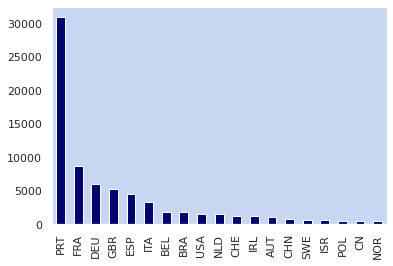

In [ ]:
#top 20 countries in bookings
ax = df.Country.value_counts()[0:19].plot.bar(color="#02036d")
ax.grid(b=None)
ax.set_facecolor("#c7d6f1")#02036d

print("The top 20 countries account for " + str((((df.Country.value_counts()[0:19].sum()/df.shape[0])*100).round(0))) + "% of bookings")
#lets remove the rest of the countries
pop_country_list = ['PRT', 'FRA', 'GBR', 'DEU', 'ESP', 'ITA', 'BEL', 'BRA', 'NLD', 'USA',
       'CHE', 'IRL', 'AUT', 'CHN', 'SWE', 'CN', 'POL', 'RUS', 'NOR']

In [ ]:
df.MarketSegment.unique()

array(['Offline TA/TO', 'Online TA', 'Groups', 'Complementary', 'Direct',
       'Corporate', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
#initial look at numeric columns
df.select_dtypes(exclude=np.number).columns

Index(['ArrivalDateMonth', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType',
       'DepositType', 'Agent', 'Company', 'CustomerType', 'ReservationStatus',
       'ReservationStatusDate'],
      dtype='object')

In [ ]:
df.duplicated().value_counts()

False    53428
True     25902
dtype: int64

In [ ]:
#there were duplicated observations. 
df[(df.duplicated()==True)&(df.LeadTime==27)]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
422             1        27             2015             July   
423             1        27             2015             July   
427             1        27             2015             July   
428             1        27             2015             July   
435             1        27             2015             July   
...           ...       ...              ...              ...   
67941           0        27             2017             June   
70819           0        27             2017            April   
73754           0        27             2017             June   
73767           0        27             2017             June   
73769           0        27             2017             June   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
422                       31                     27                     1   
423                       31                     27                     1   
427                       31                     27                     1   
428                       31                     27                     1   
435                       31                     27                     1   
...                      ...                    ...                   ...   
67941                     24                     12                     1   
70819                     17                     29                     2   
73754                     23                      9                     1   
73767                     23                      9                     1   
73769                     23                      9                     1   

       StaysInWeekNights  Adults  Children  Babies       Meal Country  \
422                    1       2       0.0       0  BB            PRT   
423                    1       2       0.0       0  BB            PRT   
427                    1       2       0.0       0  BB            PRT   
428                    1       2       0.0       0  BB            PRT   
435                    1       2       0.0       0  BB            PRT   
...                  ...     ...       ...     ...        ...     ...   
67941                  2       1       0.0       0  BB            SWE   
70819                  2       2       0.0       0  BB            POL   
73754                  2       2       0.0       0  SC            GBR   
73767                  2       2       0.0       0  SC            GBR   
73769                  2       2       0.0       0  SC            GBR   

      MarketSegment DistributionChannel  IsRepeatedGuest  \
422          Groups               TA/TO                0   
423          Groups               TA/TO                0   
427          Groups               TA/TO                0   
428          Groups               TA/TO                0   
435          Groups               TA/TO                0   
...             ...                 ...              ...   
67941        Direct              Direct                1   
70819     Online TA               TA/TO                0   
73754        Direct              Direct                0   
73767        Direct              Direct                0   
73769        Direct              Direct                0   

       PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  \
422                        0                            0  A                  
423                        0                            0  A                  
427                        0                            0  A                  
428                        0                            0  A                  
435                        0                            0  A                  
...                      ...                          ...               ...   
67941                      1                            1  A                  
70819                      0                            0  A           

In [ ]:
#drop duplicates
df.drop_duplicates(inplace=True)


In [ ]:
df["IsCanceled"].value_counts()

0    37379
1    16049
Name: IsCanceled, dtype: int64

In [ ]:
# Checking for the balance of the dataset: 
df['IsCanceled'].value_counts(normalize=True)*100

0    69.961443
1    30.038557
Name: IsCanceled, dtype: float64

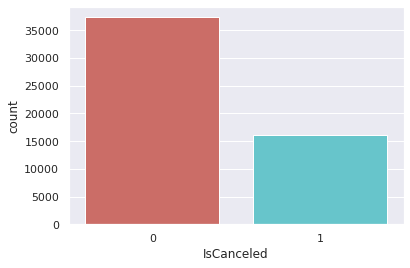

In [ ]:
sns.countplot(x='IsCanceled', data=df, palette='hls')
plt.show()

In [ ]:
#Once the duplicates are dropped, the data becomes more skewed. 

In [ ]:
df.groupby("ReservationStatus").mean()

IsCanceled    LeadTime  ArrivalDateYear  \
ReservationStatus                                            
Canceled                  1.0  104.133325      2016.349062   
Check-Out                 0.0   67.387999      2016.218064   
No-Show                   1.0   50.759358      2016.102941   

                   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  \
ReservationStatus                                                 
Canceled                       26.535651              15.788707   
Check-Out                      26.722250              15.733219   
No-Show                        24.493316              16.165775   

                   StaysInWeekendNights  StaysInWeekNights    Adults  \
ReservationStatus                                                      
Canceled                       0.949676           2.529769  1.959218   
Check-Out                      0.834613           2.157147  1.846063   
No-Show                        1.163102           2.913102  1.693850   

                   Children    Babies  IsRepeatedGuest  PreviousCancellations  \
ReservationStatus                                                               
Canceled           0.157220  0.003725         0.010065               0.060650   
Check-Out          0.121592  0.008775         0.040638               0.026138   
No-Show            0.125668  0.009358         0.046791               0.008021   

                   PreviousBookingsNotCanceled  BookingChanges  \
ReservationStatus                                                
Canceled                              0.035815        0.142866   
Check-Out                             0.256294        0.289227   
No-Show                               0.137701        0.221925   

                   DaysInWaitingList         ADR  RequiredCarParkingSpaces  \
ReservationStatus                                                            
Canceled                    1.231488  117.862318                  0.000000   
Check-Out                   0.954172  108.284982                  0.050911   
No-Show                     0.000000  105.295909                  0.000000   

                   TotalOfSpecialRequests  
ReservationStatus                          
Canceled                         0.498464  
Check-Out                        0.800797  
No-Show                          0.570856

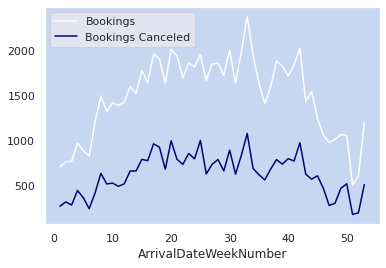

In [ ]:
#Lets look at the annual cancellations and booking over the year 
# lineplot of number of rows in the ArrivalDateWeekNumber and the number of cancellations
ax = df[["ArrivalDateWeekNumber","IsCanceled"]].groupby("ArrivalDateWeekNumber").agg(["count","sum"]).plot(color = ["white","#02036d"])
ax.grid(b=None)
ax.set_facecolor("#c7d6f1")#02036d
ax.legend(['Bookings', 'Bookings Canceled'])

[Text(0, 0, '0'),
 Text(0, 0, '10'),
 Text(0, 0, '20'),
 Text(0, 0, '30'),
 Text(0, 0, '40'),
 Text(0, 0, '50')]

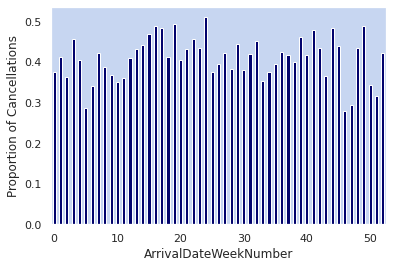

In [ ]:
# we can see here that the proportion of cancellations does not look correlated to the season, just to the # of cancellations. 
trend_df=pd.DataFrame(df[["ArrivalDateWeekNumber","IsCanceled"]].groupby("ArrivalDateWeekNumber").count())
trend_df["sum"]=df[["ArrivalDateWeekNumber","IsCanceled"]].groupby("ArrivalDateWeekNumber").sum()
trend_df["prop"]=trend_df["sum"]/trend_df["IsCanceled"]

ax = trend_df.prop.plot.bar(color = "#02036d", rot=0)
ax.grid(b=None)

ax.set_facecolor("#c7d6f1")
ax.set_ylabel("Proportion of Cancellations")
ax.set_xticks([0,10,20,30,40,50])
ax.set_xticklabels([0,10,20,30,40,50])

In [ ]:
#How long do people stay: 
df["StayLength"]=df.StaysInWeekendNights+df.StaysInWeekNights
df["Revenue"]=df.StayLength*df.ADR


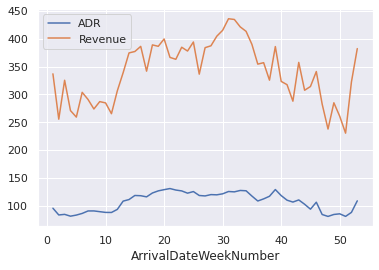

In [ ]:
# lineplot of revenue over the year
df[["ArrivalDateWeekNumber","ADR","Revenue"]].groupby("ArrivalDateWeekNumber").mean().plot()

In [ ]:
df_grouped = df.groupby("IsCanceled").mean().T
df_grouped["overall"]= df.mean()
df_grouped

#we can see here that the revenue is higher for cancellations, and the stay length is also longer. 

IsCanceled                             0            1      overall
LeadTime                       67.387999   101.645710    77.678521
ArrivalDateYear              2016.218064  2016.337591  2016.253968
ArrivalDateWeekNumber          26.722250    26.440464    26.637606
ArrivalDateDayOfMonth          15.733219    15.806281    15.755166
StaysInWeekendNights            0.834613     0.959624     0.872164
StaysInWeekNights               2.157147     2.547635     2.274444
Adults                          1.846063     1.946850     1.876338
Children                        0.121592     0.155749     0.131851
Babies                          0.008775     0.003988     0.007337
IsRepeatedGuest                 0.040638     0.011776     0.031968
PreviousCancellations           0.026138     0.058197     0.035768
PreviousBookingsNotCanceled     0.256294     0.040563     0.191491
BookingChanges                  0.289227     0.146551     0.246369
DaysInWaitingList               0.954172     1.174092     1.020233
ADR                           108.284982   117.276632   110.985944
RequiredCarParkingSpaces        0.050911     0.000000     0.035618
TotalOfSpecialRequests          0.800797     0.501838     0.710994
StayLength                      2.991760     3.507259     3.146609
Revenue                       325.306881   412.141294   351.390685

In [ ]:
#average length of stay for non-business travelers
df[df["Company"]!="       NULL"].StayLength.mean()

2.0233644859813085

In [ ]:
df[["Revenue","ArrivalDateYear","IsCanceled"]][df["IsCanceled"]==0].groupby("ArrivalDateYear").sum()

Revenue  IsCanceled
ArrivalDateYear                        
2015             1352540.71           0
2016             5913496.14           0
2017             4893609.06           0

In [ ]:
df["ArrivalDateMonthNumber"]=df.ArrivalDateMonth.apply(lambda a: datetime.datetime.strptime(a, '%B').month)

In [ ]:
# adjusting the arrival date variable
df["ArrivalDate"]=df.apply(lambda a: datetime.date(a["ArrivalDateYear"], a["ArrivalDateMonthNumber"], a["ArrivalDateDayOfMonth"]),axis=1)

In [ ]:
#reservationstatus = cancelled/AllCancelled = 15301/16049 = 95%
canceled_in_advance = df[df["ReservationStatus"]=="Canceled"]

In [ ]:
canceled_in_advance["notice"] = canceled_in_advance["ArrivalDate"]- canceled_in_advance["ReservationStatusDate"].apply(lambda a: datetime.datetime.strptime(a,'%Y-%m-%d').date())

In [ ]:
canceled_in_advance["notice"].mean()

Timedelta('63 days 08:13:19.947715836')

In [ ]:
#Although useful for exploration, we drop reservation status and reservation status date as these would cause information leakage in modeling
#also removing date columns as we now have an ArrivalDate column
df.drop(['ArrivalDateMonth', 'ArrivalDateYear', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth','ArrivalDateMonthNumber',"ReservationStatus","ReservationStatusDate"], axis=1, inplace=True)

In [ ]:
#Define metric and non metric features: 
non_metric_features = ["Agent", "AssignedRoomType", "Company", "Country", "CustomerType", "DepositType", "DistributionChannel", 
                       "IsRepeatedGuest", "MarketSegment", "Meal","ReservedRoomType", "IsCanceled"]
metric_features=[i for i in list(df.columns) if i not in non_metric_features]

non_metric_features_without_target = non_metric_features.copy()
non_metric_features_without_target.remove('IsCanceled')

### Data Visualization: 

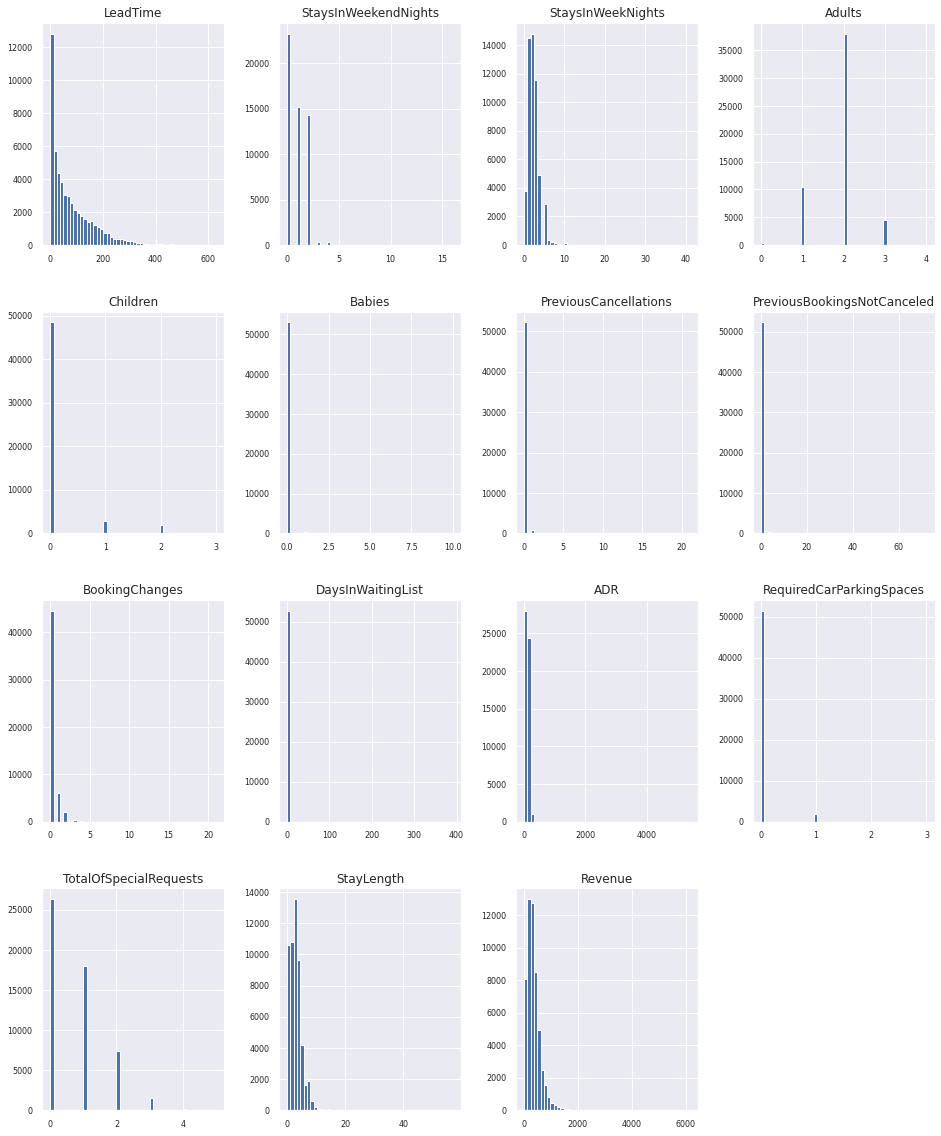

In [ ]:
df[metric_features].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

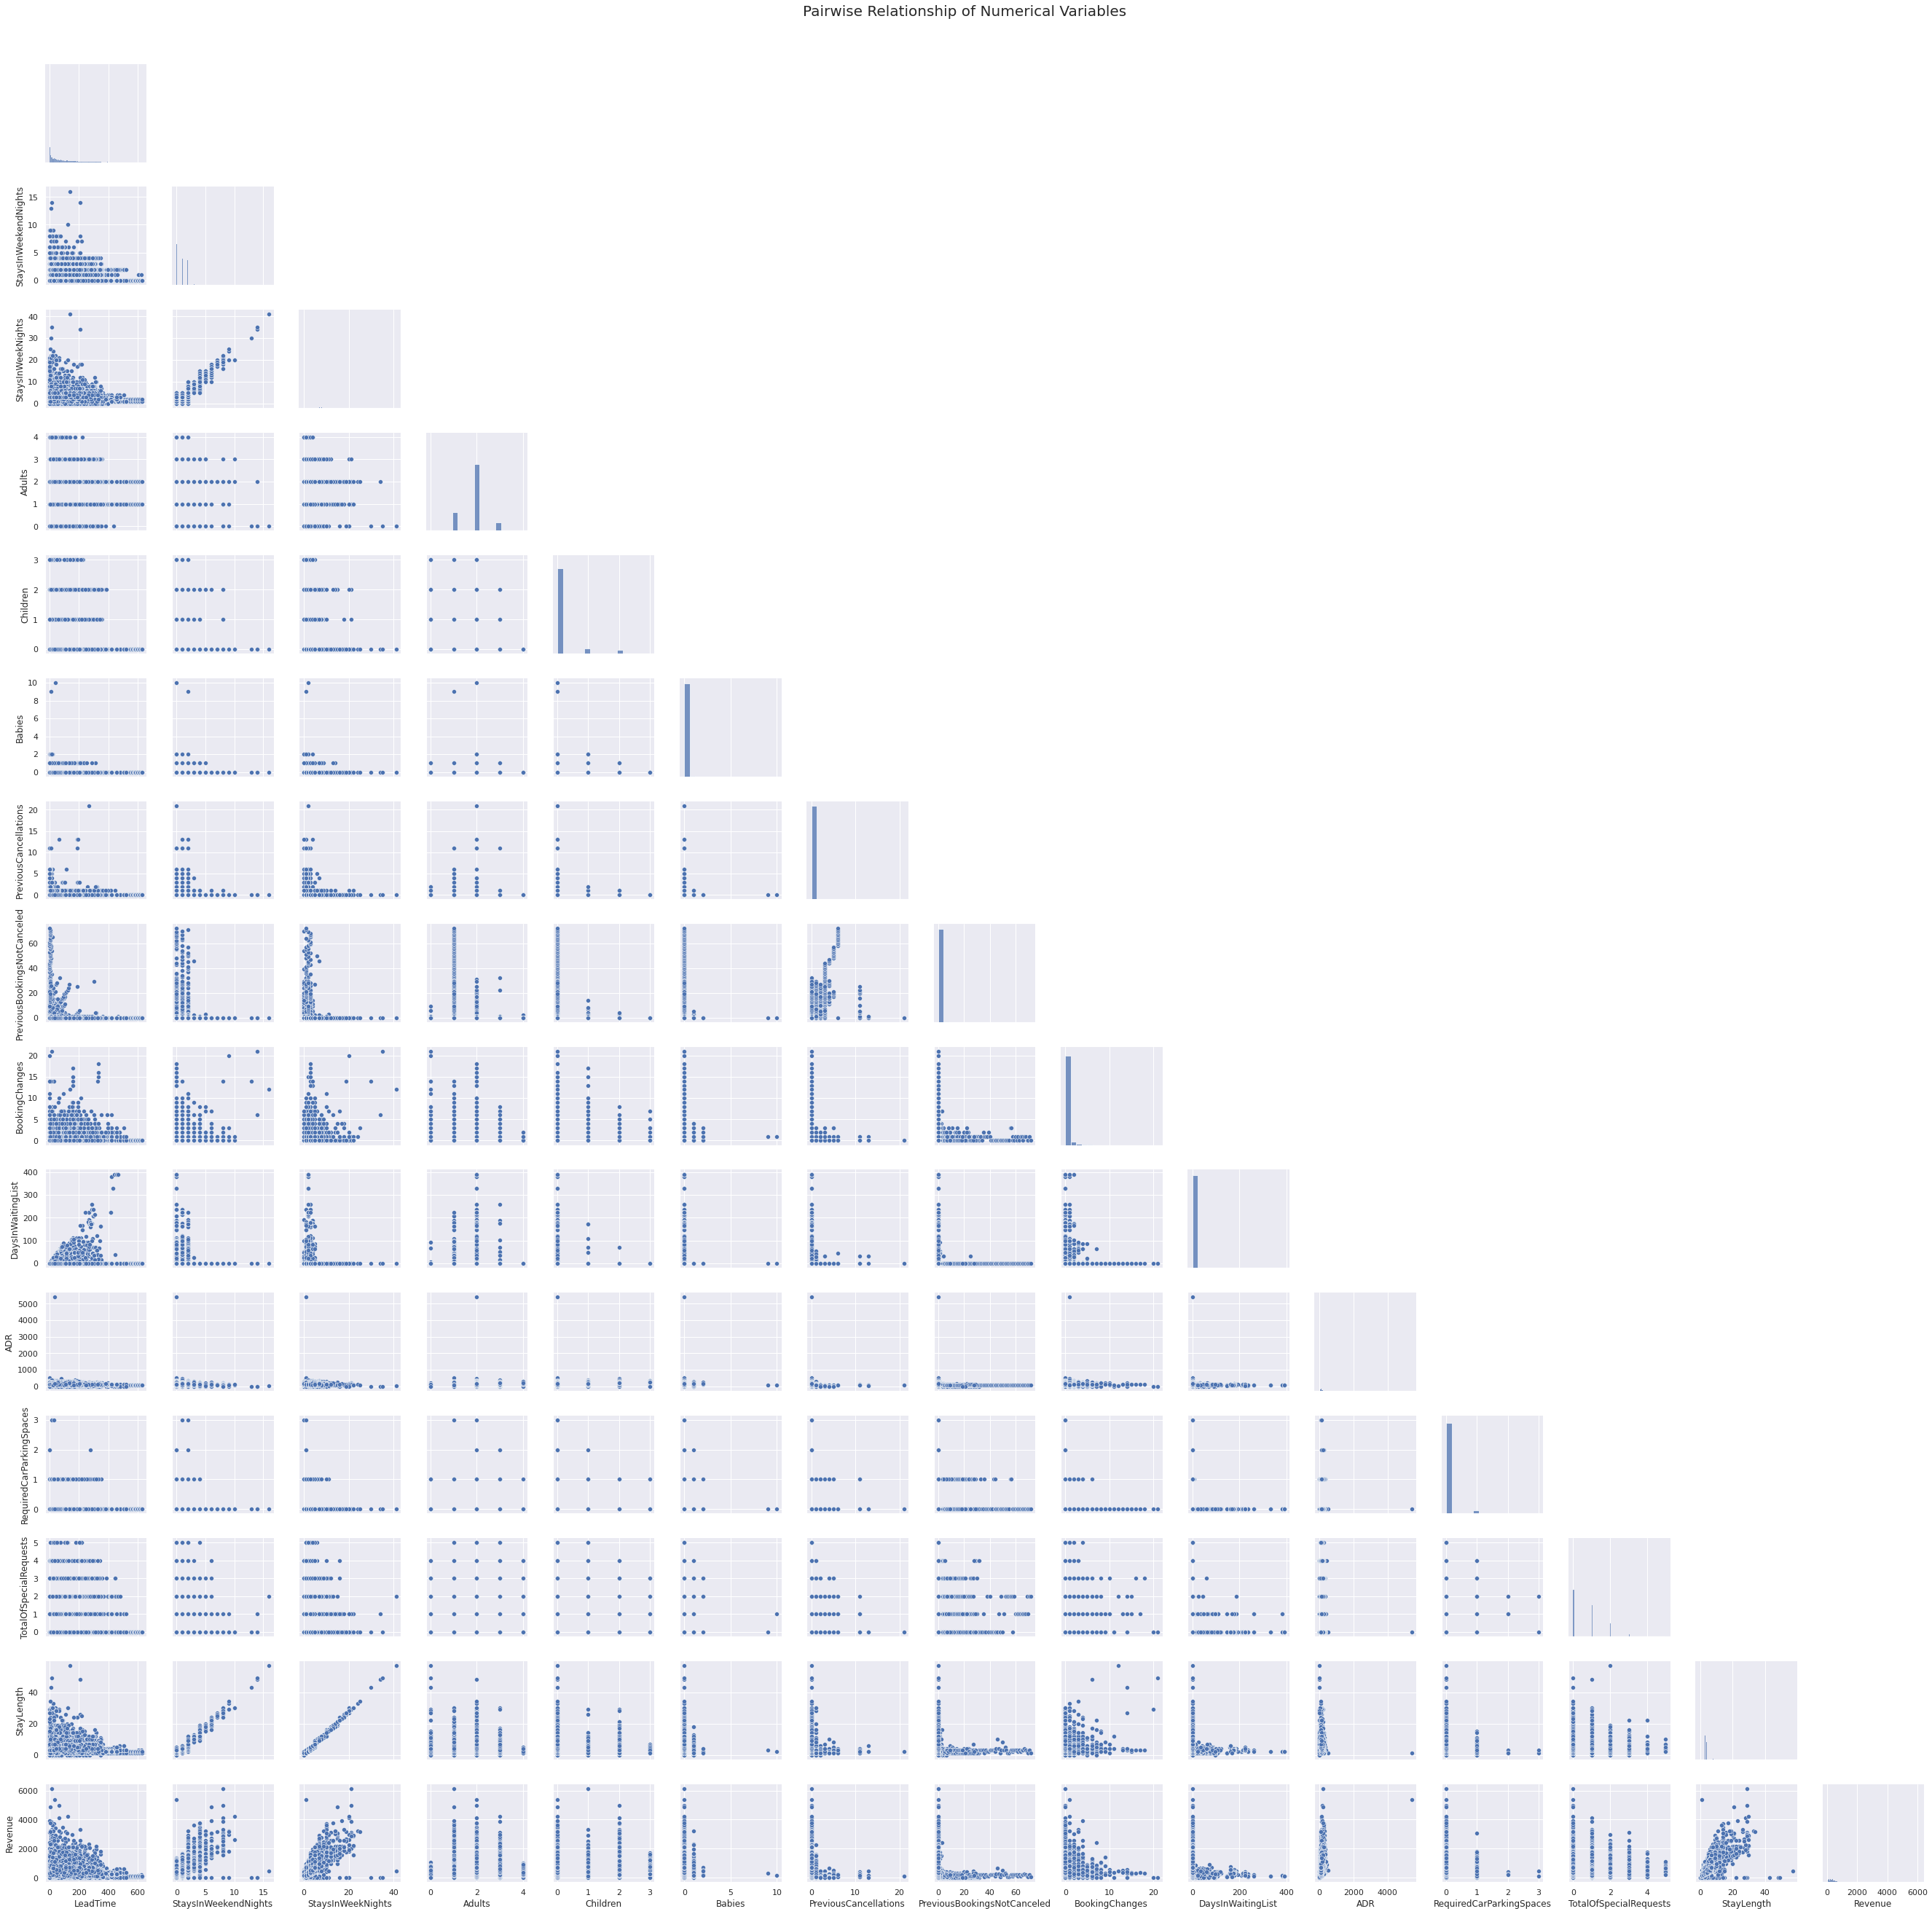

In [ ]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist", corner=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

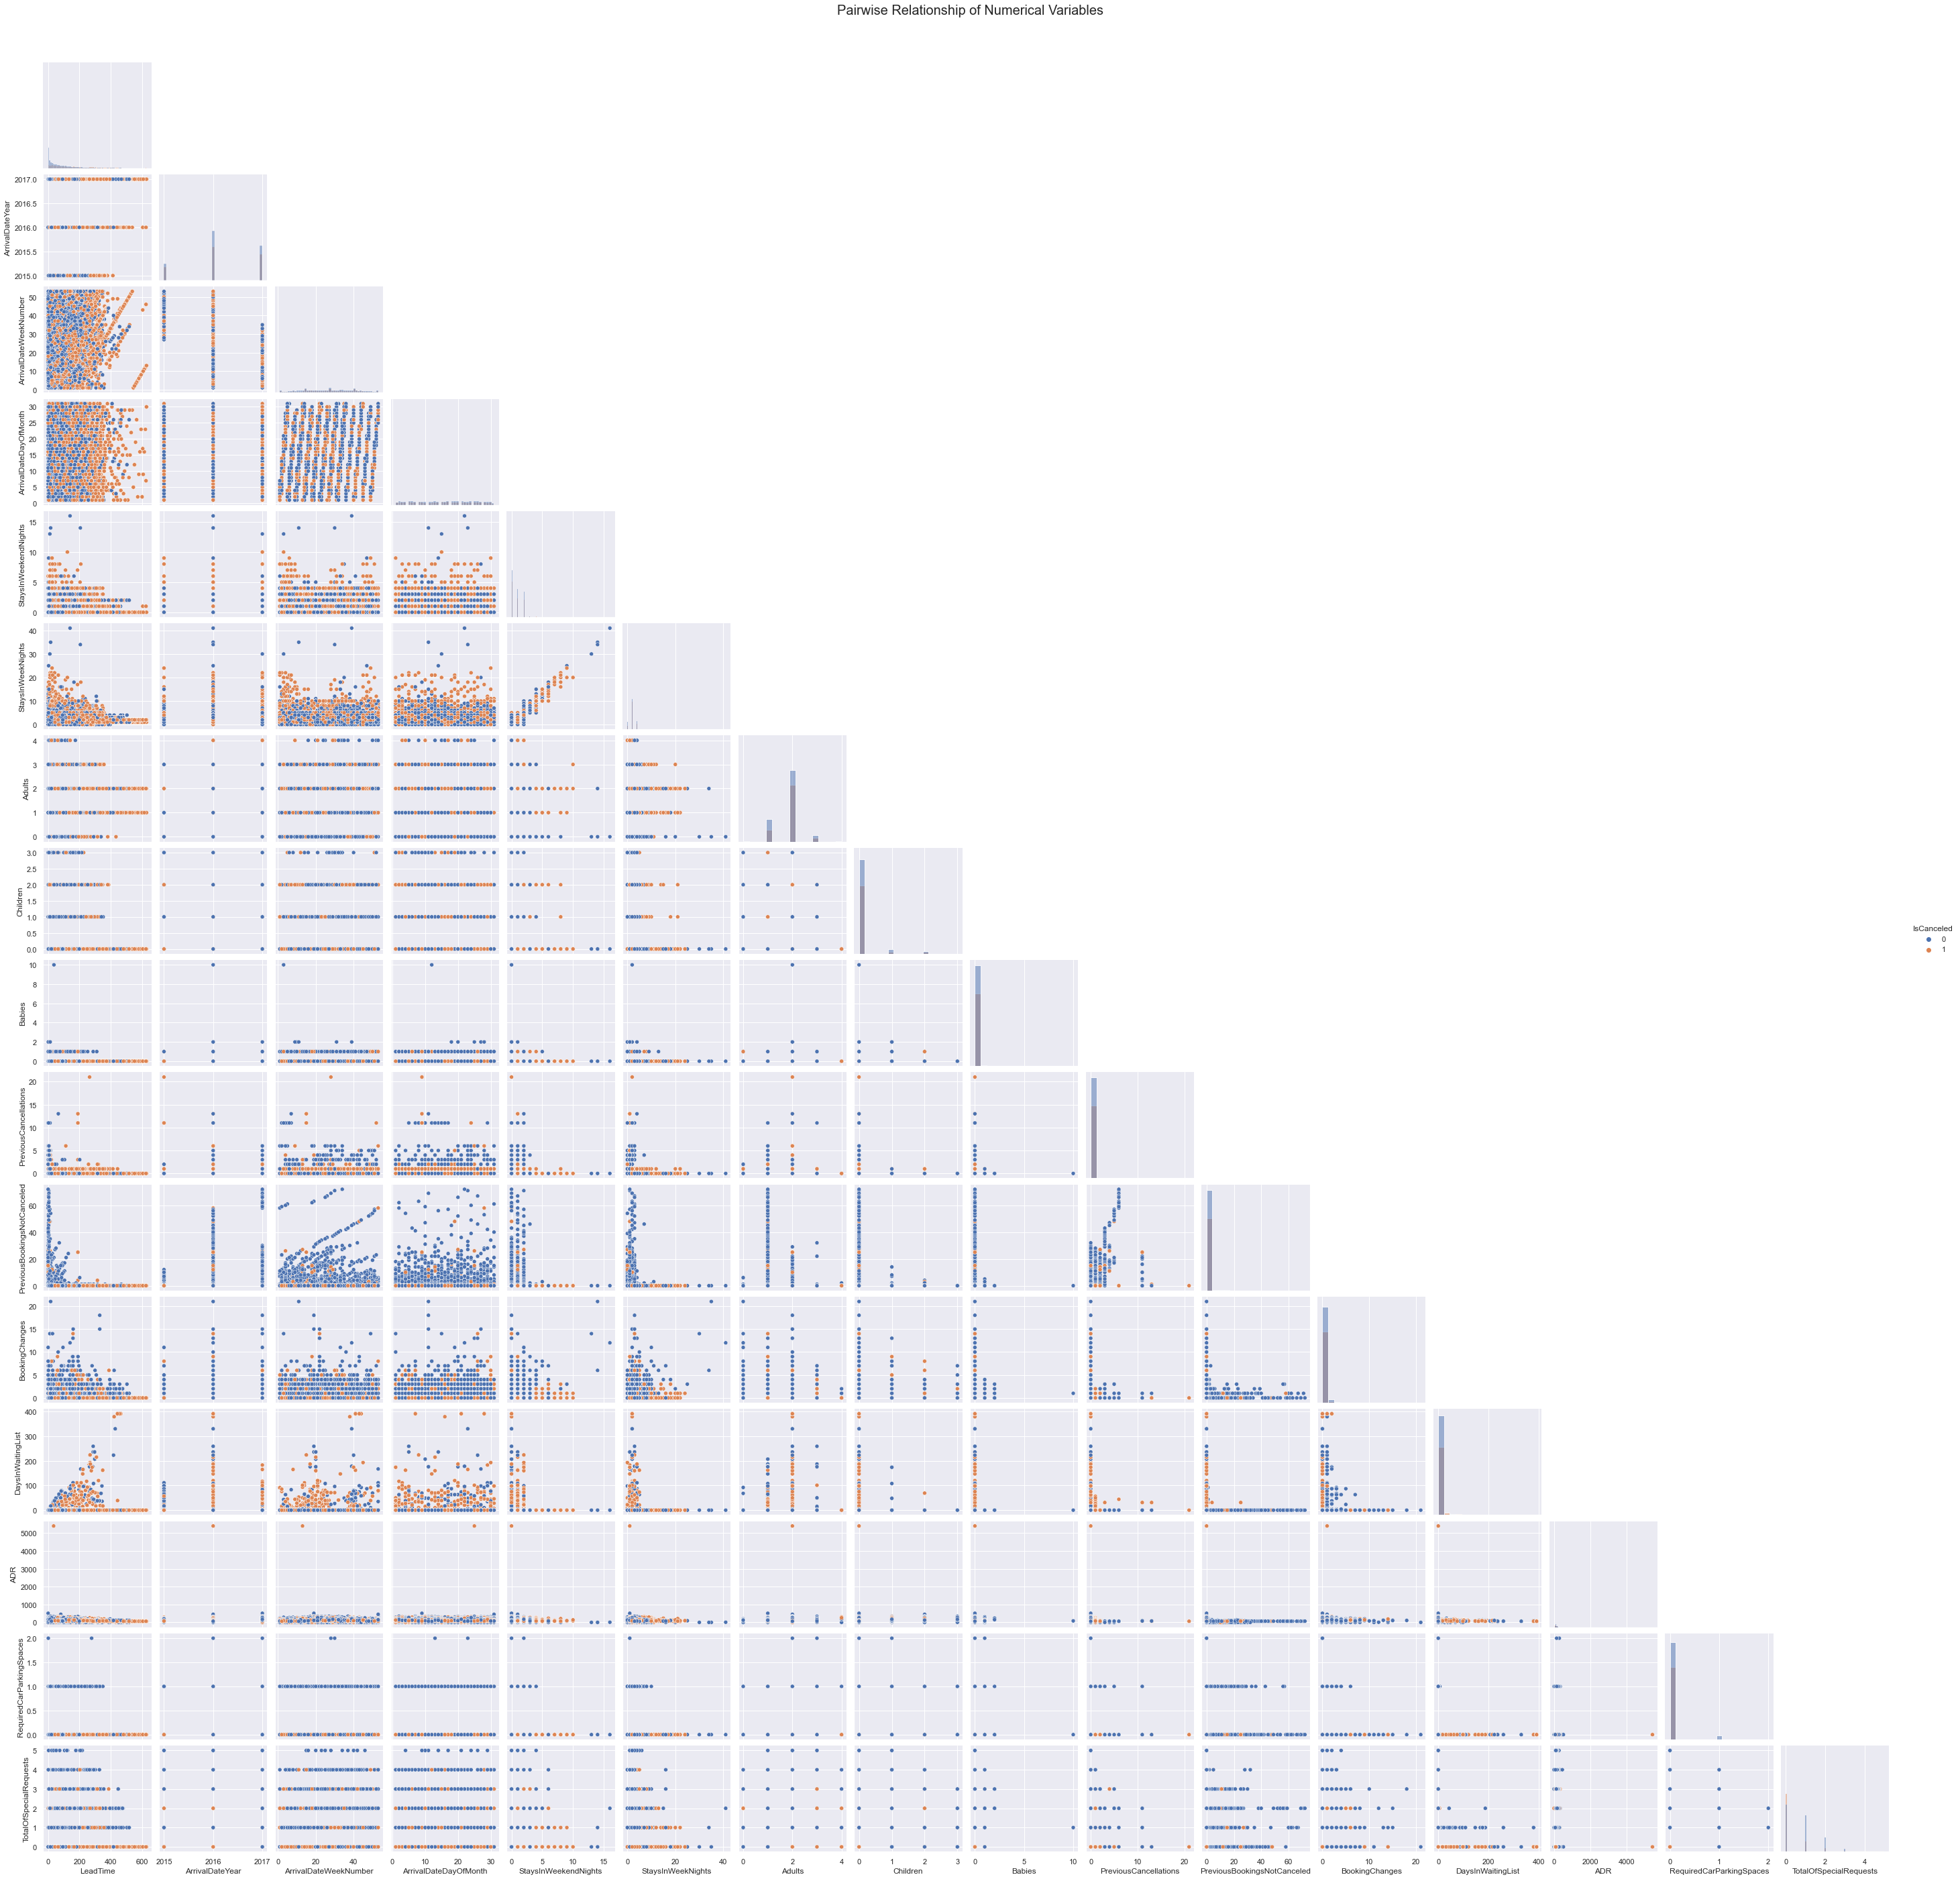

In [ ]:
#Do not run (taking too long or bugged)

#Pairwise Relationship of Numerical Variables
sns.set()

##Setting pairplot
sns.pairplot(df[metric_features + ['IsCanceled']], diag_kind="hist", corner=True, hue='IsCanceled')

## Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
plt.show()

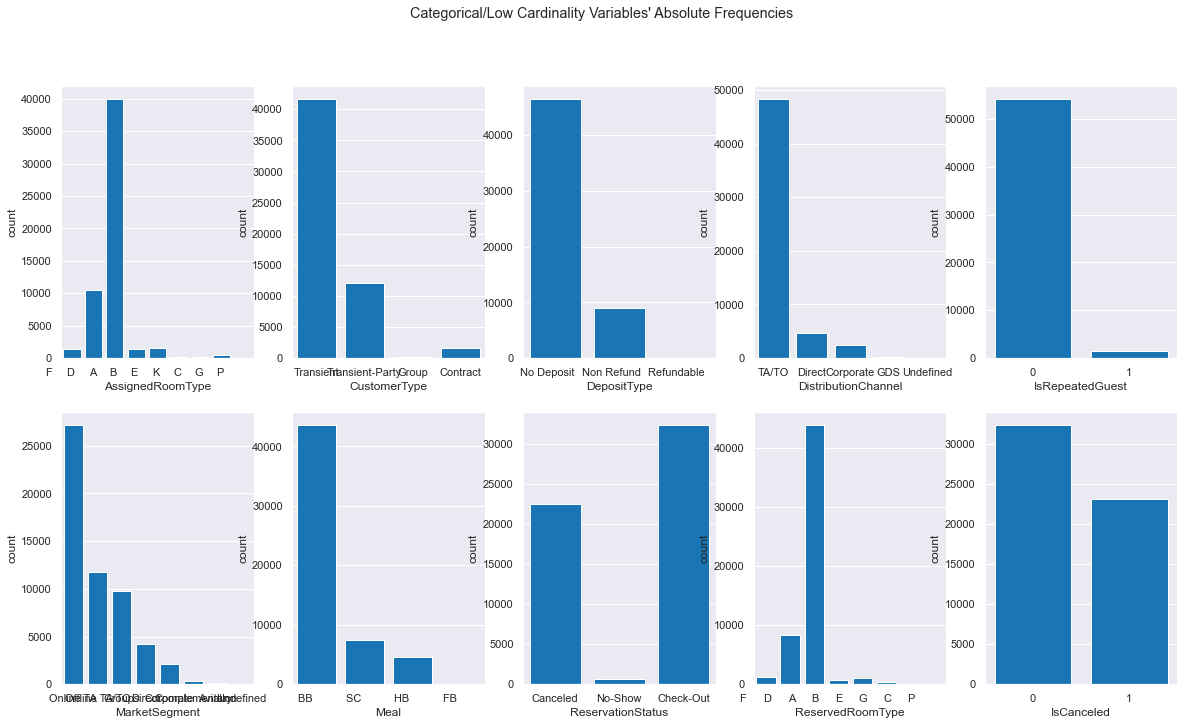

In [ ]:
#Do not run
# All Non-Metric Variables' Absolute Frequencies
sns.set()

## Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(5), figsize=(20, 11))

## Plot data
## Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), ["AssignedRoomType", "CustomerType", "DepositType", "DistributionChannel", 
                       "IsRepeatedGuest", "MarketSegment", "Meal","ReservedRoomType", "IsCanceled"]): 
    sns.countplot(df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
plt.show()

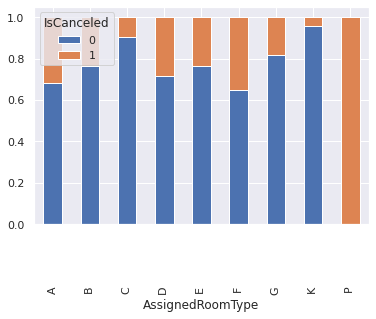

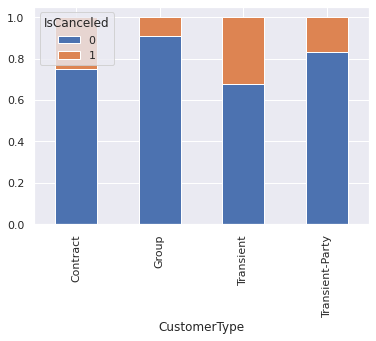

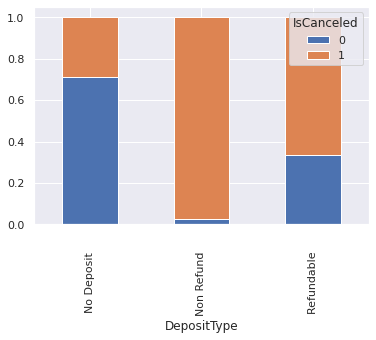

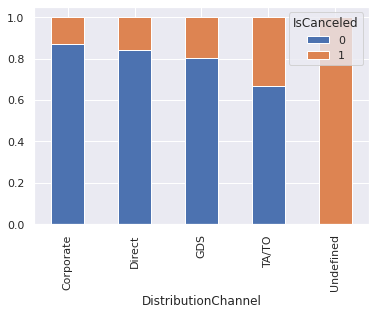

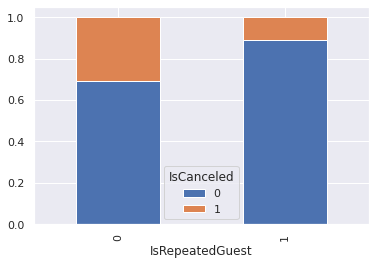

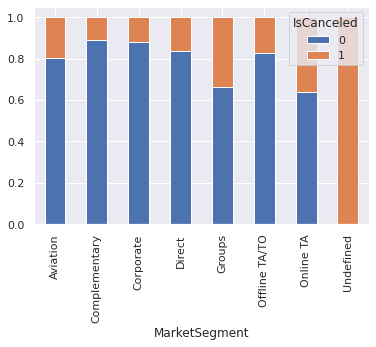

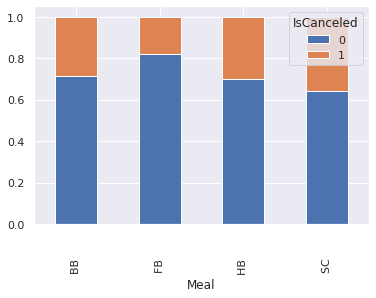

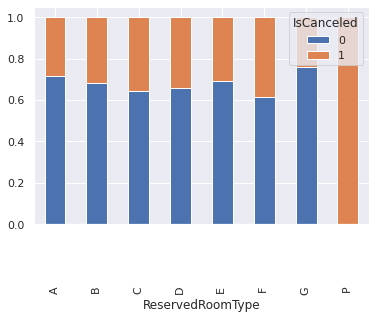

In [ ]:
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), ["AssignedRoomType", "CustomerType", "DepositType", "DistributionChannel", 
                       "IsRepeatedGuest", "MarketSegment", "Meal","ReservedRoomType"]): 
    table=pd.crosstab(df[feat],df.IsCanceled)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [ ]:
#It seems all categorical variables are important in modeling

# Data Preparation: 

In [ ]:
'''
Data issues found during exploration phase to be taken care of now in preprocessing
weeks of the year has one value of 53
babies has an outlier of 9 and 10
days in waiting list has outliers
NULL text string is inplace of nans often
we need to do some transformations on the date variables
do we need the company or can we make it a binary variable
consider changing Babies to binary variable
lots of categorical variables to check 
possible created feature: percentage of weekend nights in the stay
consider logADR depending on the distribution
4 nans in Children - fill with 0
we have a few duplicated values
'''

In [ ]:
#traintest split here
X = df.drop('IsCanceled', axis = 1)
y = df['IsCanceled']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y, shuffle = True)
df=pd.concat([X_train,y_train], axis=1)
df_test_backup = pd.concat([X_test,y_test], axis=1)

In [ ]:
df_test_backup

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
45113        26                     1                  3       3       0.0   
58307        54                     0                  2       1       0.0   
761           0                     0                  1       2       0.0   
27623       236                     1                  1       2       0.0   
18996       277                     1                  3       2       0.0   
...         ...                   ...                ...     ...       ...   
24505        11                     1                  1       2       0.0   
49033        45                     2                  0       2       0.0   
65737         1                     0                  1       2       0.0   
43457        31                     0                  2       2       0.0   
45978        37                     0                  2       2       1.0   

       Babies       Meal Country  MarketSegment DistributionChannel  \
45113       0  BB            FRA  Offline TA/TO               TA/TO   
58307       0  BB            NLD      Online TA               TA/TO   
761         0  SC            PRT      Online TA               TA/TO   
27623       0  HB            FRA      Online TA               TA/TO   
18996       0  BB            ITA      Online TA               TA/TO   
...       ...        ...     ...            ...                 ...   
24505       0  BB            PRT         Groups               TA/TO   
49033       0  BB            BEL         Direct              Direct   
65737       0  BB            PRT         Direct              Direct   
43457       0  BB            PRT      Corporate           Corporate   
45978       0  BB            ESP      Online TA               TA/TO   

       IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  \
45113                0                      0                            0   
58307                1                      0                            3   
761                  0                      0                            0   
27623                0                      0                            0   
18996                0                      0                            0   
...                ...                    ...                          ...   
24505                0                      0                            0   
49033                0                      0                            0   
65737                0                      0                            0   
43457                0                      0                            0   
45978                0                      0                            0   

       ReservedRoomType  AssignedRoomType  BookingChanges      DepositType  \
45113  A                 D                              0  No Deposit        
58307  D                 A                              0  No Deposit        
761    A                 A                              0  No Deposit        
27623  A                 A                              0  No Deposit        
18996  A                 A                              0  No Deposit        
...                 ...               ...             ...              ...   
24505  A                 A                              0  No Deposit        
49033  A                 E                              1  No Deposit        
65737  A                 D                              1  No Deposit        
43457  A                 A                              0  No Deposit        
45978  A                 D                              0  No Deposit        

             Agent      Company  DaysInWaitingList     CustomerType     ADR  \
45113           28         NULL                  0        Transient  118.00   
58307            7         NULL                  0        Transient   78.31   
761              9         NULL                  0        Transient   89.00   
27623            9         


### Remove Outliers

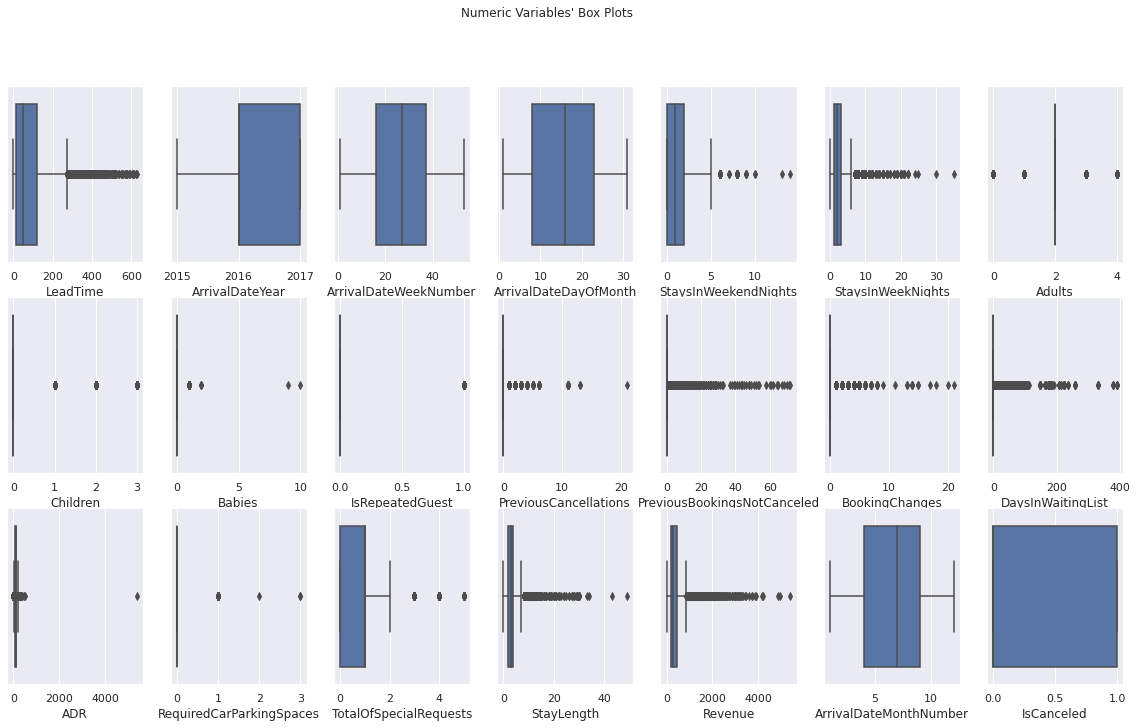

In [ ]:
# plot outliers
%matplotlib inline
num_vars=df.select_dtypes(include=np.number).set_index(df.index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_vars): # Notice the zip() function and flatten() method
    sns.boxplot(x=num_vars[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [ ]:
'''manual outlier removal:
Babies
ADR
DaysInWaitingList'''

In [ ]:
filters1 = (
    (df['Babies']<=5)
    &
    (df['ADR']<=2000)
    &
    (df['DaysInWaitingList']<=300)
)

df = df[filters1]

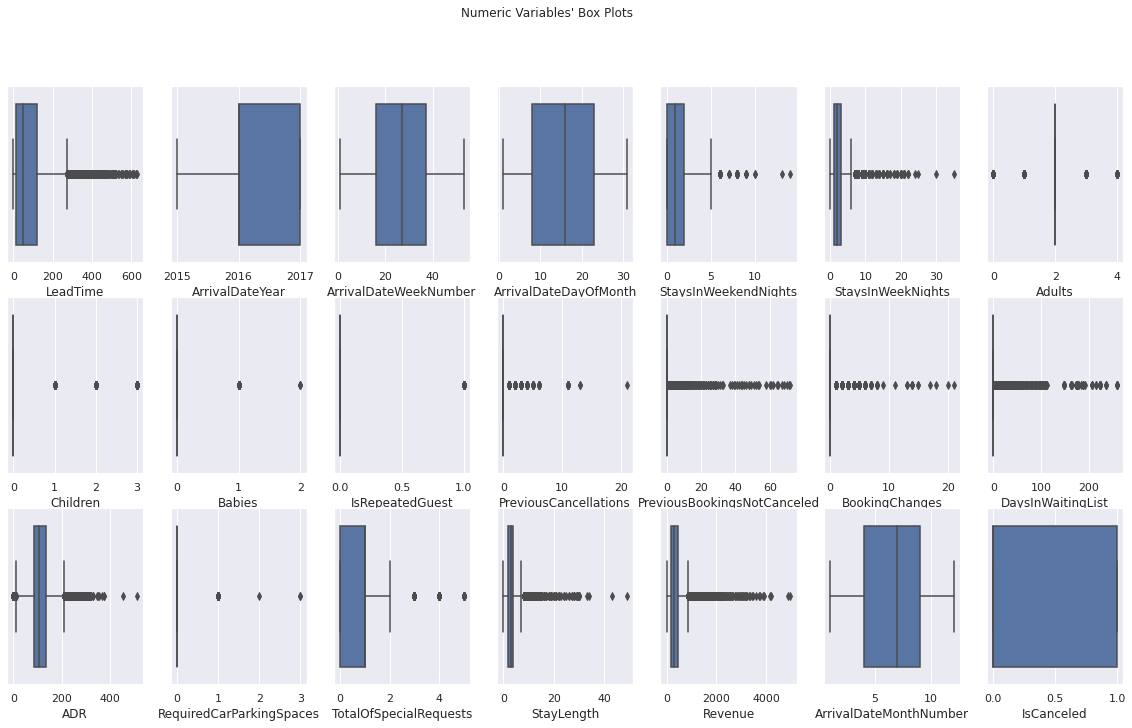

In [ ]:
# plot outliers
%matplotlib inline
num_vars=df.select_dtypes(include=np.number).set_index(df.index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_vars): # Notice the zip() function and flatten() method
    sns.boxplot(x=num_vars[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

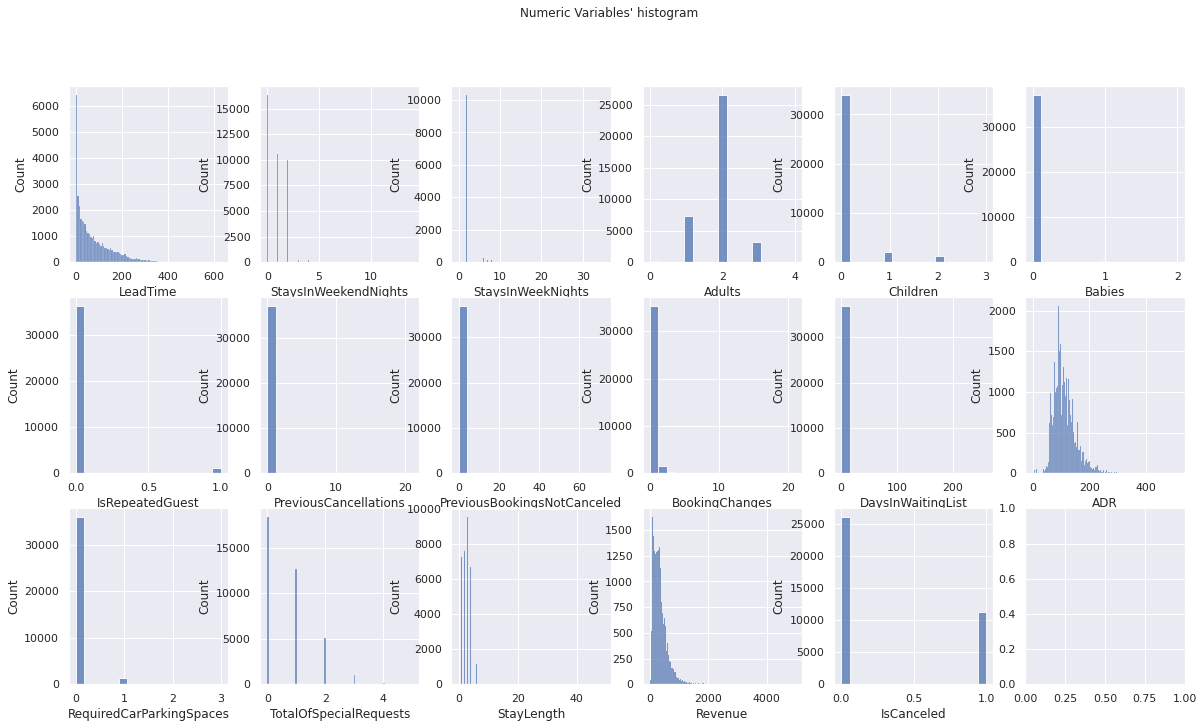

In [ ]:
# plot outliers
%matplotlib inline
num_vars=df.select_dtypes(include=np.number).set_index(df.index)

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(num_vars.shape[1] / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), num_vars): # Notice the zip() function and flatten() method
    sns.histplot(x=num_vars[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' histogram"

plt.suptitle(title)

plt.show()

## Fill Missing Values

In [ ]:
#check for =="NULL" as well as .isna()
df.Children.fillna(0, inplace = True)
df.replace('       NULL',np.nan, inplace=True)
df.replace('NULL',np.nan, inplace=True)

In [ ]:
df.isnull().sum()

LeadTime                           0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           0
Babies                             0
Meal                               0
Country                            5
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                           3879
Company                        35461
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
TotalOfSpecialRequests             0
StayLength                         0
Revenue                            0
ArrivalDate                        0
I

In [ ]:
# Missing values in the variables agent and company indicate that the reservation was made 
#by an individual rather than by a travel agency or a comapny
#And given that these 2 variables have many unique values(+100),We thought about changing them
#to represent 1 if an agency or a company made the reservation and 0 otherwise

In [ ]:
df['Agent'].fillna(0, inplace=True)
df['Company'].fillna(0, inplace=True)
df.loc[df['Agent']!=0, 'Agent'] = 1
df.loc[df['Company']!=0, 'Company'] = 1

In [ ]:
#Fill missing values with "Unknown", since we do not have the information (was probably not informed during booking)
df['Country'].fillna("Unknown", inplace=True)

In [ ]:
df.isnull().sum()

LeadTime                       0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          0
Company                        0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
StayLength                     0
Revenue                        0
ArrivalDate                    0
IsCanceled                     0
dtype: int64

### Change data types:

In [ ]:
df.dtypes

LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType                    object
ADR                      

In [ ]:
#Change Children from float to int
df['Children'] = df['Children'].astype(int)

In [ ]:
df.dtypes

LeadTime                                int64
ArrivalDateYear                         int64
ArrivalDateMonth                       object
ArrivalDateWeekNumber                   int64
ArrivalDateDayOfMonth                   int64
StaysInWeekendNights                    int64
StaysInWeekNights                       int64
Adults                                  int64
Children                                int32
Babies                                  int64
Meal                                   object
Country                                object
MarketSegment                          object
DistributionChannel                    object
IsRepeatedGuest                         int64
PreviousCancellations                   int64
PreviousBookingsNotCanceled             int64
ReservedRoomType                       object
AssignedRoomType                       object
BookingChanges                          int64
DepositType                            object
Agent                             

In [ ]:
df.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
61718         6                     1                  3       1         0   
4551         59                     2                  3       2         0   
61588        55                     0                  1       2         0   
3191         56                     0                  2       2         0   
63999         0                     1                  2       1         0   

       Babies       Meal Country  MarketSegment DistributionChannel  \
61718       0  BB            DZA      Corporate           Corporate   
4551        0  BB            PRT      Online TA               TA/TO   
61588       0  BB            TWN      Online TA               TA/TO   
3191        0  HB            FRA  Offline TA/TO               TA/TO   
63999       0  BB            PRT         Direct              Direct   

       IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  \
61718                0                      0                            0   
4551                 0                      0                            0   
61588                0                      0                            0   
3191                 0                      0                            0   
63999                0                      0                            0   

       ReservedRoomType  AssignedRoomType  BookingChanges      DepositType  \
61718  D                 D                              0  No Deposit        
4551   A                 A                              0  No Deposit        
61588  A                 K                              1  No Deposit        
3191   A                 B                              0  No Deposit        
63999  A                 A                              0  No Deposit        

      Agent Company  DaysInWaitingList     CustomerType     ADR  \
61718     0       1                  0        Transient  100.63   
4551      1       0                  0         Contract   89.25   
61588     1       0                  0        Transient  102.60   
3191      1       0                  0  Transient-Party   82.00   
63999     0       0                  0        Transient  109.67   

       RequiredCarParkingSpaces  TotalOfSpecialRequests  StayLength  Revenue  \
61718                         0                       0           4   402.52   
4551                          0                       2           5   446.25   
61588                         1                       1           1   102.60   
3191                          0                       0           2   164.00   
63999                         0                       0           3   329.01   

      ArrivalDate  IsCanceled  logADR  logRevenue  Chil_dum  Parking_dum  \
61718  2016-11-14           0    4.61        6.00         0            0   
4551   2015-10-08           1    4.49        6.10         0            0   
61588  2016-11-15           0    4.63        4.63         0            1   
3191   2015-09-17           0    4.41        5.10         0            0   
63999  2017-01-02           0    4.70        5.80         0            0   

       Requests_dum  Prev_cancel_dum  
61718             0                0  
4551              1                0  
61588             1                0  
3191              0                0  
63999             0                0

### Feature Engineering:

In [ ]:
#Created columns:
#df["StayLength"]=df.StaysInWeekendNights+df.StaysInWeekNights
#df["Revenue"]=df.StayLength*df.ADR
df["logADR"]=df["ADR"].map(lambda x : 1 if x<=1 else x)
df["logADR"]=np.log(df["logADR"])
df["logRevenue"]=df["Revenue"].map(lambda x : 1 if x<=1 else x)
df["logRevenue"]=np.log(df["logRevenue"])

In [ ]:
df["Chil_dum"]=df.apply(lambda a: 1 if a["Children"]>=1 | a["Babies"]>=1 else 0 ,axis=1)
df["Parking_dum"]=df.apply(lambda a: 1 if a["RequiredCarParkingSpaces"]>=1 else 0 ,axis=1)
df["Requests_dum"]=df.apply(lambda a: 1 if a["TotalOfSpecialRequests"]>=1 else 0 ,axis=1)
df["Prev_cancel_dum"]=df.apply(lambda a: 1 if a["PreviousCancellations"]>=1 else 0 ,axis=1)

In [ ]:
pop_country_list = ['PRT', 'FRA', 'GBR', 'DEU', 'ESP', 'ITA', 'BEL', 'BRA', 'NLD', 'USA',
       'CHE', 'IRL', 'AUT', 'CHN', 'SWE', 'CN', 'POL', 'RUS', 'NOR']

In [ ]:
#limiting country to only top 20 
df["Country"]=df["Country"].map(lambda x : x if x in pop_country_list else "Other")

In [ ]:
metric_features.extend(['logADR', 'logRevenue'])
non_metric_features.extend(['Chil_dum', 'Parking_dum', 'Requests_dum', 'Prev_cancel_dum'])
non_metric_features_without_target.extend(['Chil_dum', 'Parking_dum', 'Requests_dum', 'Prev_cancel_dum'])

In [ ]:
non_metric_features

['Agent',
 'AssignedRoomType',
 'Company',
 'Country',
 'CustomerType',
 'DepositType',
 'DistributionChannel',
 'IsRepeatedGuest',
 'MarketSegment',
 'Meal',
 'ReservedRoomType',
 'IsCanceled',
 'Chil_dum',
 'Parking_dum',
 'Requests_dum',
 'Prev_cancel_dum']

In [ ]:
metric_features, non_metric_features

(['LeadTime',
  'StaysInWeekendNights',
  'StaysInWeekNights',
  'Adults',
  'Children',
  'Babies',
  'PreviousCancellations',
  'PreviousBookingsNotCanceled',
  'BookingChanges',
  'DaysInWaitingList',
  'ADR',
  'RequiredCarParkingSpaces',
  'TotalOfSpecialRequests',
  'StayLength',
  'Revenue',
  'logADR',
  'logRevenue'],
 ['Agent',
  'AssignedRoomType',
  'Company',
  'Country',
  'CustomerType',
  'DepositType',
  'DistributionChannel',
  'IsRepeatedGuest',
  'MarketSegment',
  'Meal',
  'ReservedRoomType',
  'IsCanceled',
  'Chil_dum',
  'Parking_dum',
  'Requests_dum',
  'Prev_cancel_dum'])

In [ ]:
df_backup = df.copy()

In [ ]:
'''
need to make dummies: 
'Agent',
  'AssignedRoomType',
  'Company',
  'Country',
  'CustomerType',
  'DepositType',
  'DistributionChannel',
  'IsRepeatedGuest',
  'MarketSegment',
  'Meal',
  'ReservedRoomType'
  '''

## Feature selection: 

In [ ]:
metric_features= ['LeadTime',
  'StaysInWeekendNights',
  'StaysInWeekNights',
  'Adults',
  'Children',
  'Babies',
  'PreviousCancellations',
  'PreviousBookingsNotCanceled',
  'BookingChanges',
  'DaysInWaitingList',
  'ADR',
  'RequiredCarParkingSpaces',
  'TotalOfSpecialRequests',
  'StayLength',
  'Revenue',
  'logADR',
  'logRevenue']

In [ ]:
#scaling the train data
scaler= RobustScaler().fit(df[metric_features])
scaledfeatures = scaler.transform(df[metric_features])
scaledfeatures= pd.DataFrame(scaledfeatures, columns = df[metric_features].columns).set_index(df[metric_features].index)
scaledfeatures

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  \
61718 -0.423077                   0.0                0.5    -1.0       0.0   
4551   0.086538                   0.5                0.5     0.0       0.0   
61588  0.048077                  -0.5               -0.5     0.0       0.0   
3191   0.057692                  -0.5                0.0     0.0       0.0   
63999 -0.480769                   0.0                0.0    -1.0       0.0   
...         ...                   ...                ...     ...       ...   
12036 -0.375000                   0.0                0.5    -1.0       0.0   
62565 -0.461538                  -0.5                0.0     0.0       0.0   
53176  0.153846                   0.0               -1.0    -1.0       0.0   
21332  0.500000                  -0.5                0.0     0.0       1.0   
59418  1.384615                   0.5                1.0     0.0       0.0   

       Babies  PreviousCancellations  PreviousBookingsNotCanceled  \
61718     0.0                    0.0                          0.0   
4551      0.0                    0.0                          0.0   
61588     0.0                    0.0                          0.0   
3191      0.0                    0.0                          0.0   
63999     0.0                    0.0                          0.0   
...       ...                    ...                          ...   
12036     0.0                    0.0                          0.0   
62565     0.0                    0.0                          0.0   
53176     0.0                    0.0                          0.0   
21332     0.0                    0.0                          0.0   
59418     0.0                    0.0                          0.0   

       BookingChanges  DaysInWaitingList       ADR  RequiredCarParkingSpaces  \
61718             0.0                0.0 -0.094021                       0.0   
4551              0.0                0.0 -0.323133                       0.0   
61588             1.0                0.0 -0.054359                       1.0   
3191              0.0                0.0 -0.469096                       0.0   
63999             0.0                0.0  0.087981                       0.0   
...               ...                ...       ...                       ...   
12036             0.0                0.0  0.316086                       0.0   
62565             0.0                0.0  0.738877                       0.0   
53176             0.0                0.0 -0.724784                       0.0   
21332             0.0                0.0  0.090598                       0.0   
59418             0.0                0.0  0.006040                       0.0   

       TotalOfSpecialRequests  StayLength   Revenue    logADR  logRevenue  
61718                    -1.0         0.5  0.380145 -0.097490    0.317825  
4551                      1.0         1.0  0.538587 -0.355401    0.426365  
61588                     0.0        -1.0 -0.706522 -0.055824   -1.120734  
3191                     -1.0        -0.5 -0.484058 -0.537478   -0.627119  
63999                    -1.0         0.0  0.113804  0.087388    0.105597  
...                       ...         ...       ...       ...         ...  
12036                    -1.0         0.5  0.675362  0.298676    0.511828  
62565                     1.0        -0.5 -0.049275  0.642611   -0.049228  
53176                     0.0        -1.0 -0.827174 -0.899117   -1.533695  
21332                     0.0        -0.5 -0.282609  0.089934   -0.319875  
59418                     0.0         1.5  1.217391  0.006114    0.795279  

[37385 rows x 17 columns]

In [ ]:
df= pd.concat([scaledfeatures, df["ArrivalDate"], df[non_metric_features]], axis=1)

### Redundancy: 

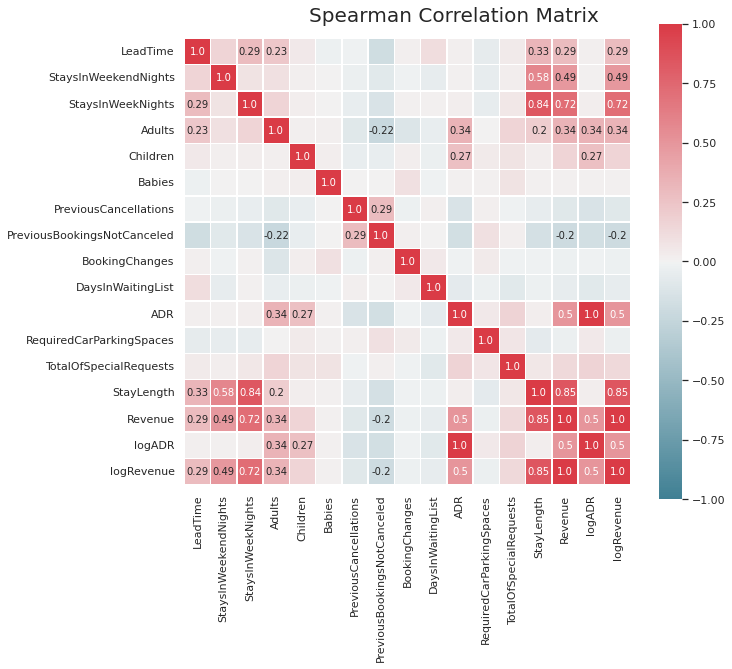

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = round(df[metric_features].corr(method="spearman"),2)

# Build annotation matrix (values above |0.2| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.2
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

In [ ]:
#Almost all the features are not correlated
# There's a considerable correlation between 'StaysInWeekendNights' and 'logRevenue' althought it can be ignored
# there are correlations between the created variables but that is also to be expected

## Relevancy: 

### Correlation:

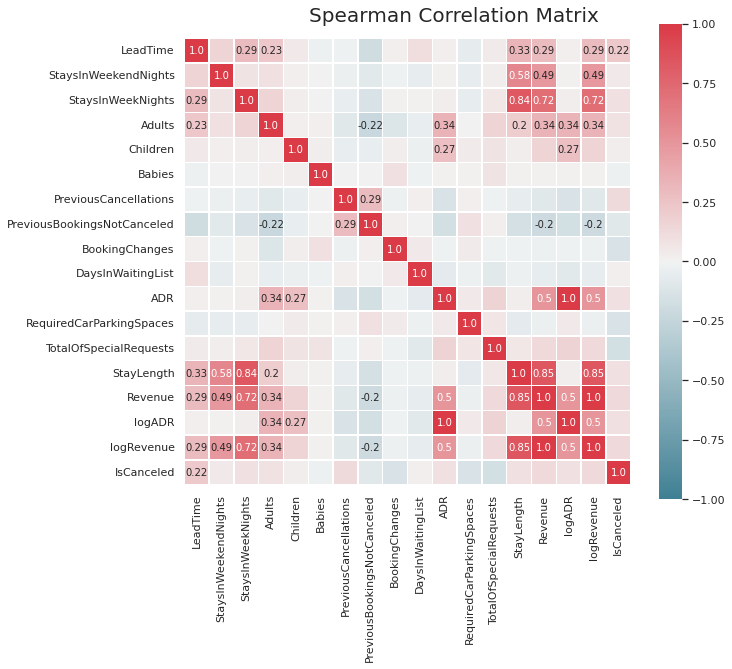

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = round(df[metric_features+['IsCanceled']].corr(method="spearman"),2)

# Build annotation matrix (values above |0.2| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.2
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

By checking the spearman correlation we can notice that the only numeric variable slightly correlated with cancellations seems to be lead time. 

### Chi-Square for categorical data

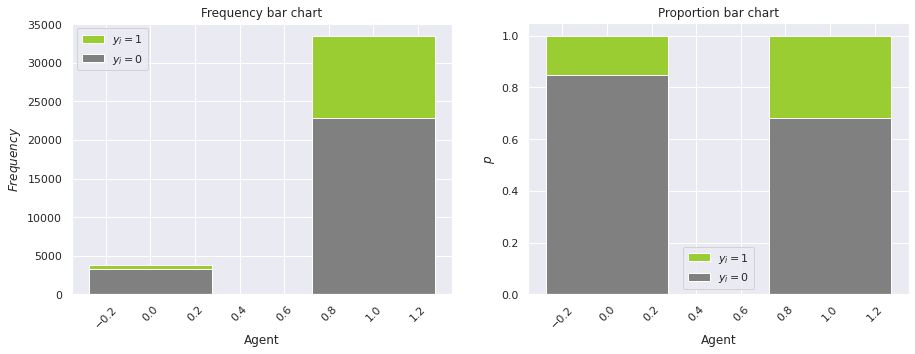

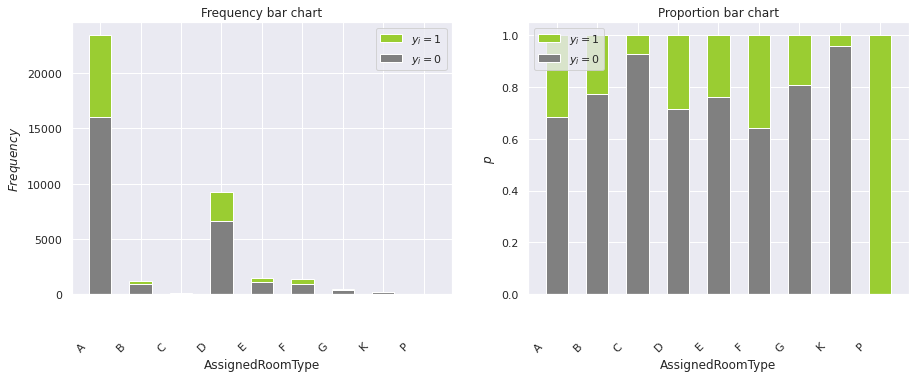

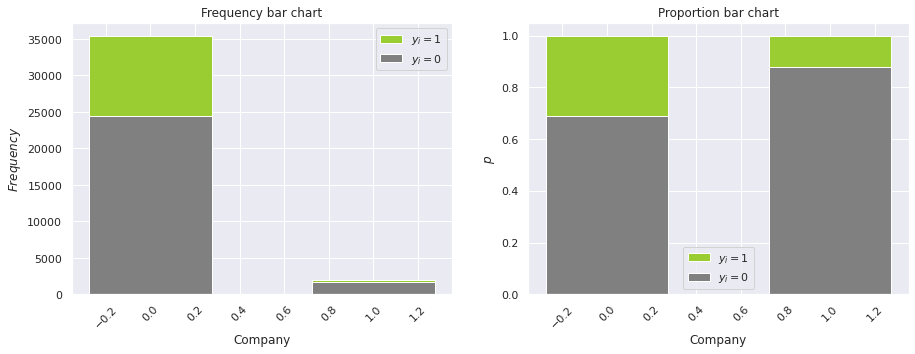

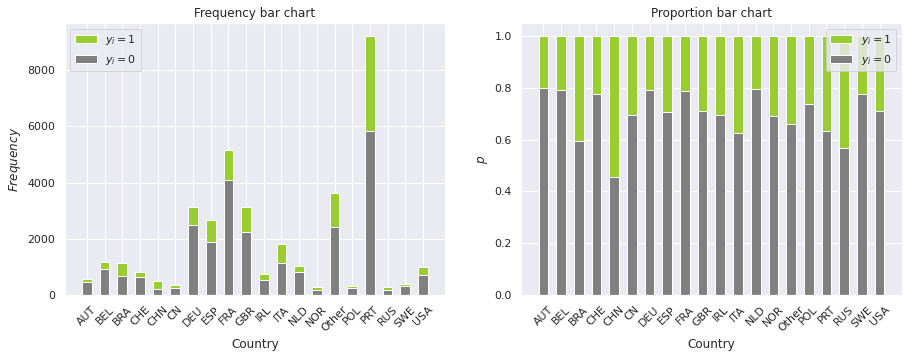

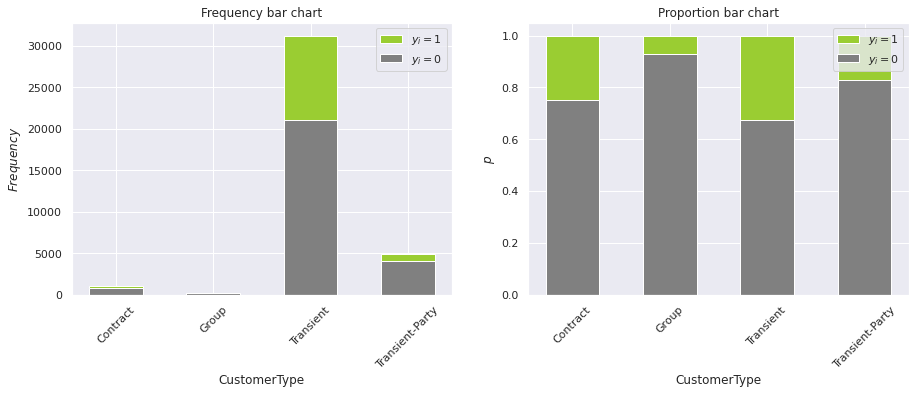

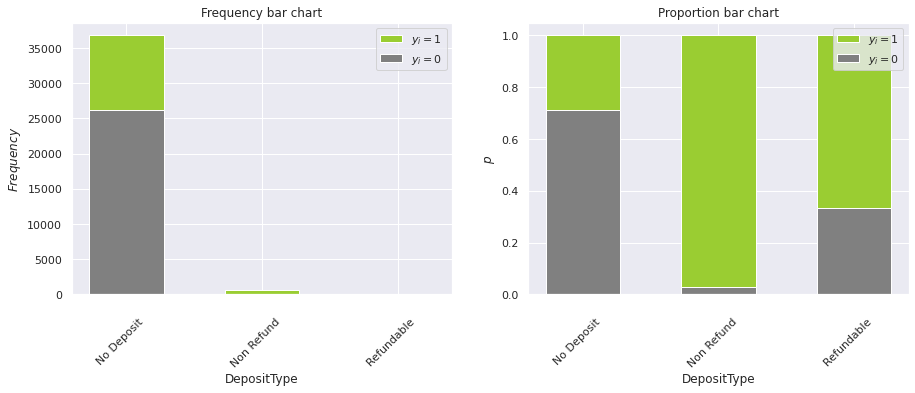

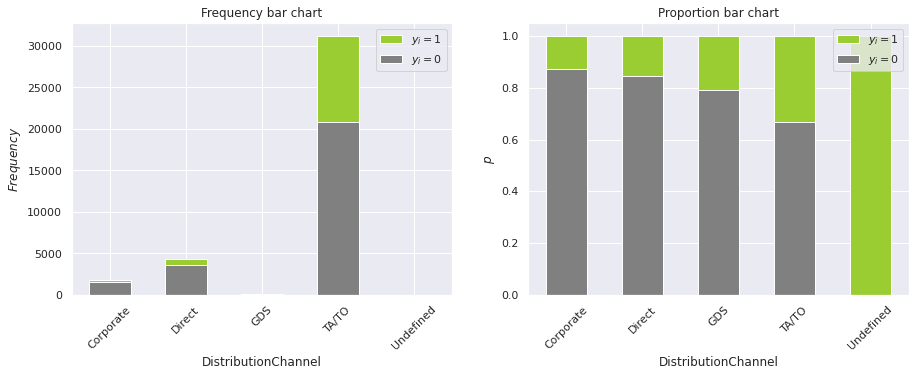

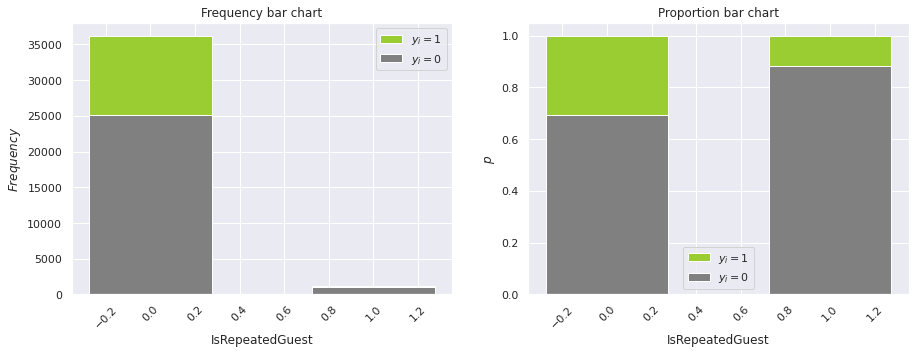

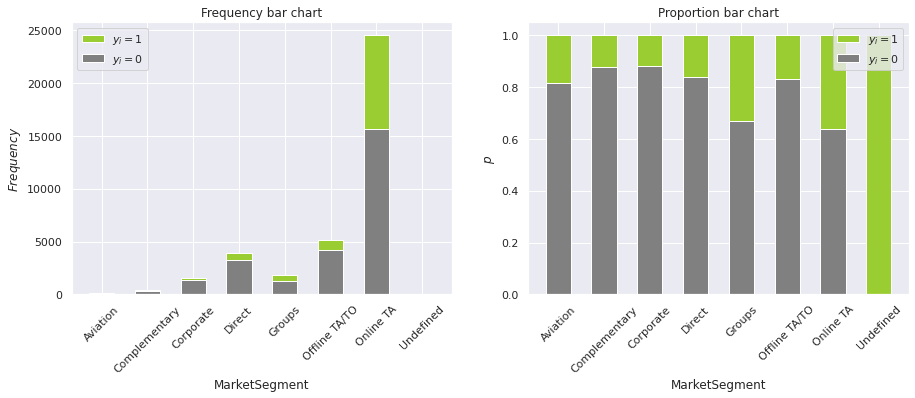

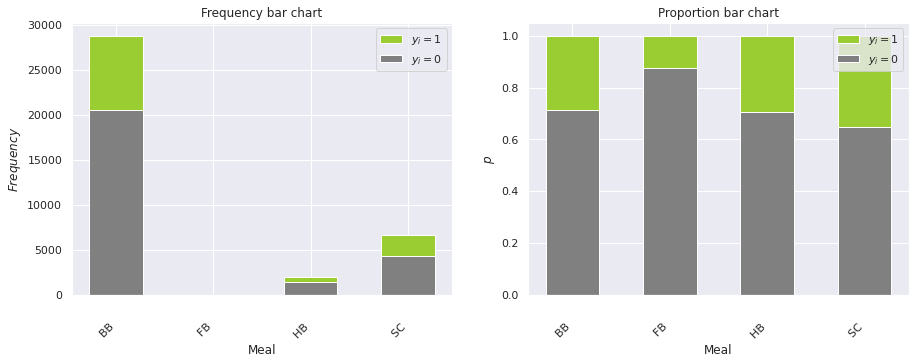

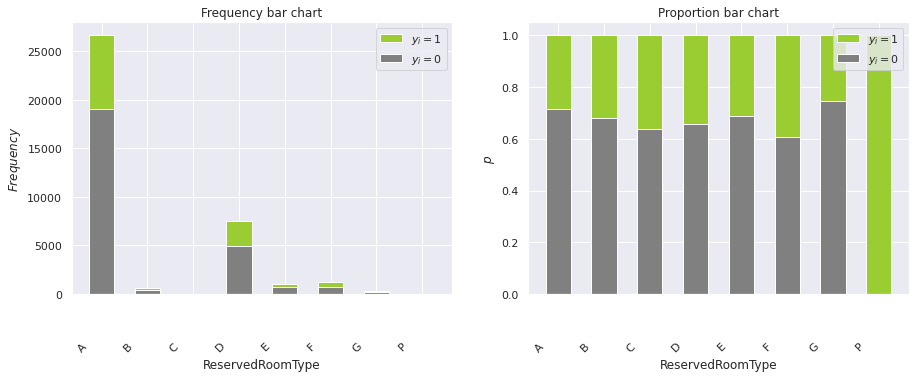

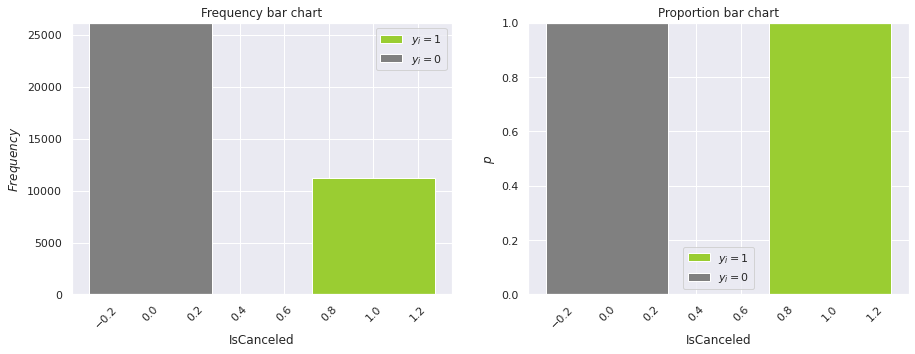

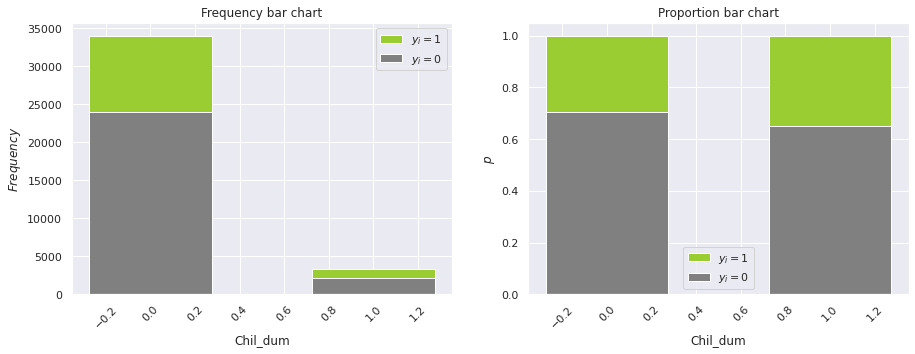

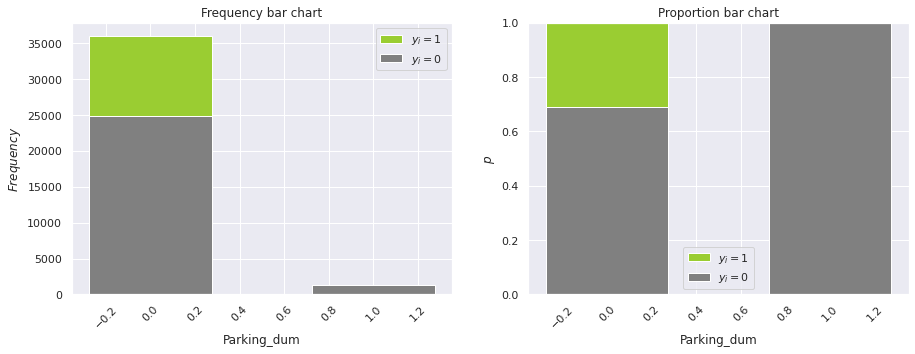

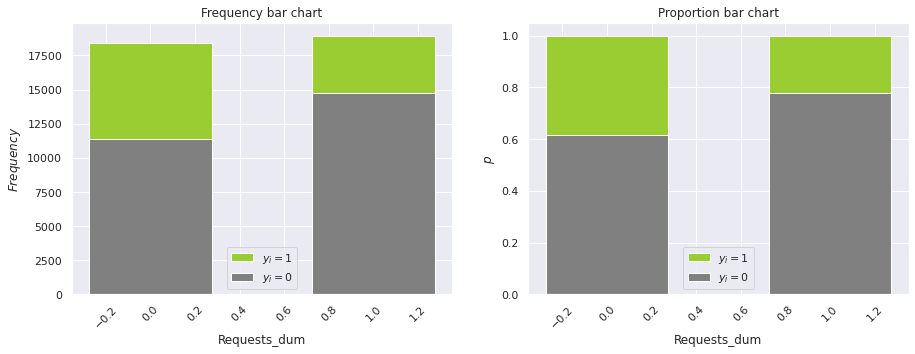

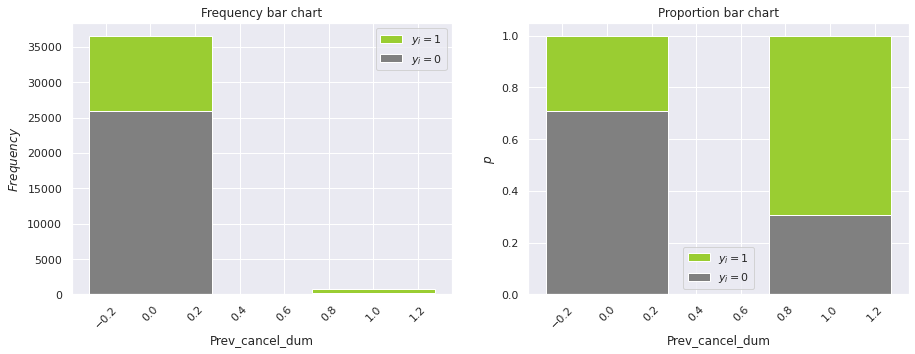

In [ ]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$Frequency$")

   
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                         np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$p$")

    plt.show()  
    
for i in range(len(df[non_metric_features].columns)):
     bar_charts_categorical(df=df[non_metric_features],target="IsCanceled",feature=df[non_metric_features].columns[i])

In [ ]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [ ]:
#Weird 

for var in df[non_metric_features_without_target]:
    TestIndependence(df[var],df['IsCanceled'], var)

Agent is IMPORTANT for Prediction
AssignedRoomType is IMPORTANT for Prediction
Company is IMPORTANT for Prediction
Country is IMPORTANT for Prediction
CustomerType is IMPORTANT for Prediction
DepositType is IMPORTANT for Prediction
DistributionChannel is IMPORTANT for Prediction
IsRepeatedGuest is IMPORTANT for Prediction
MarketSegment is IMPORTANT for Prediction
Meal is IMPORTANT for Prediction
ReservedRoomType is IMPORTANT for Prediction
Chil_dum is IMPORTANT for Prediction
Parking_dum is IMPORTANT for Prediction
Requests_dum is IMPORTANT for Prediction
Prev_cancel_dum is IMPORTANT for Prediction


In [ ]:
df_chi = df[non_metric_features].apply(lambda x:x.astype("category"))
df_chi=df_chi.apply(lambda x: x.cat.codes)

In [ ]:
X = df_chi[non_metric_features_without_target]
y = df_chi["IsCanceled"]

In [ ]:
# Lets use the sklearn chi2 fnction
from sklearn.feature_selection import chi2,SelectKBest
cs = SelectKBest(score_func=chi2,k=15)
cs.fit(X,y)
feature_score = pd.DataFrame({"Score":cs.scores_,"P_Value":cs.pvalues_},index=X.columns)
feature_score.nlargest(n=15,columns="Score")

Score        P_Value
DepositType          1241.056203  7.290625e-272
Prev_cancel_dum       591.339157  1.281221e-130
Parking_dum           569.976910  5.679884e-126
Requests_dum          569.302161  7.963713e-126
Country               524.327442  4.842360e-116
MarketSegment         339.359989   8.795370e-76
ReservedRoomType      322.617636   3.897002e-72
Company               288.964724   8.358627e-65
DistributionChannel   228.202556   1.470082e-51
Meal                  217.766450   2.777083e-49
IsRepeatedGuest       187.561688   1.082878e-42
AssignedRoomType      126.028544   3.030922e-29
Agent                  46.780635   7.939406e-12
Chil_dum               38.581601   5.251162e-10
CustomerType           14.861909   1.156754e-04

In [ ]:
#all categorical features appear important, so lets keep the single variable dummies and drop the numeric counter parts: 
metric_features =  ['LeadTime',  'StaysInWeekendNights',  'StaysInWeekNights',  'Adults',  'PreviousBookingsNotCanceled',  'BookingChanges',  'DaysInWaitingList',  'ADR',  'StayLength', 
                    'Revenue',  'ArrivalDate',  'logADR',  'logRevenue']

In [ ]:
#with remaining categorical features, lets split them into their dummy variables to test each separately
cat_vars = ['Agent',  'AssignedRoomType',  'Company',  'Country',  'CustomerType',  'DepositType',
  'DistributionChannel',  'IsRepeatedGuest',  'MarketSegment',  'Meal','ReservedRoomType']

In [ ]:
df_chi = df[cat_vars].apply(lambda x:x.astype("category"))
df_chi = pd.get_dummies(df_chi, drop_first=True)

In [ ]:
X =  df_chi
y = df["IsCanceled"]

In [ ]:
df_chi.shape

(37385, 56)

In [ ]:
# Apply sklearn ch2 and grab only the variables with p value less than .05
chc=SelectKBest(score_func=chi2,k=56)
chc.fit(X,y)
features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,3)},index=X.columns)
features_score_pvalue.nlargest(n=30,columns="Score")

Score  P_Value
DepositType_Non Refund             1235.855466      0.0
MarketSegment_Online TA             444.179755      0.0
DistributionChannel_Direct          427.239194      0.0
MarketSegment_Offline TA/TO         413.373147      0.0
CustomerType_Transient-Party        398.809945      0.0
MarketSegment_Direct                365.091431      0.0
Company_1                           288.964724      0.0
MarketSegment_Corporate             238.756414      0.0
Country_PRT                         203.897800      0.0
Country_FRA                         198.690145      0.0
IsRepeatedGuest_1                   187.561688      0.0
Country_CHN                         143.641498      0.0
DistributionChannel_TA/TO           132.969740      0.0
Country_DEU                         130.950958      0.0
Meal_SC                              91.558825      0.0
CustomerType_Transient               83.777277      0.0
ReservedRoomType_D                   68.987722      0.0
AssignedRoomType_K                   61.125481      0.0
Country_BRA                          58.241069      0.0
MarketSegment_Complementary          55.411822      0.0
CustomerType_Group                   50.892242      0.0
ReservedRoomType_F                   50.671185      0.0
Agent_1                              46.780635      0.0
Country_BEL                          45.864348      0.0
Country_NLD                          45.575880      0.0
Country_ITA                          45.382197      0.0
AssignedRoomType_B                   28.428408      0.0
AssignedRoomType_C                   27.517947      0.0
AssignedRoomType_E                   27.176416      0.0
AssignedRoomType_G                   25.725988      0.0

In [ ]:
#so our new dataset is:
df_full = pd.concat([df[metric_features],df_chi,df[['Chil_dum',  'Parking_dum',  'Requests_dum',  'Prev_cancel_dum']],df["IsCanceled"]],axis=1)
df_full

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  \
61718 -0.423077                   0.0                0.5    -1.0   
4551   0.086538                   0.5                0.5     0.0   
61588  0.048077                  -0.5               -0.5     0.0   
3191   0.057692                  -0.5                0.0     0.0   
63999 -0.480769                   0.0                0.0    -1.0   
...         ...                   ...                ...     ...   
12036 -0.375000                   0.0                0.5    -1.0   
62565 -0.461538                  -0.5                0.0     0.0   
53176  0.153846                   0.0               -1.0    -1.0   
21332  0.500000                  -0.5                0.0     0.0   
59418  1.384615                   0.5                1.0     0.0   

       PreviousBookingsNotCanceled  BookingChanges  DaysInWaitingList  \
61718                          0.0             0.0                0.0   
4551                           0.0             0.0                0.0   
61588                          0.0             1.0                0.0   
3191                           0.0             0.0                0.0   
63999                          0.0             0.0                0.0   
...                            ...             ...                ...   
12036                          0.0             0.0                0.0   
62565                          0.0             0.0                0.0   
53176                          0.0             0.0                0.0   
21332                          0.0             0.0                0.0   
59418                          0.0             0.0                0.0   

            ADR  StayLength   Revenue ArrivalDate    logADR  logRevenue  \
61718 -0.094021         0.5  0.380145  2016-11-14 -0.097490    0.317825   
4551  -0.323133         1.0  0.538587  2015-10-08 -0.355401    0.426365   
61588 -0.054359        -1.0 -0.706522  2016-11-15 -0.055824   -1.120734   
3191  -0.469096        -0.5 -0.484058  2015-09-17 -0.537478   -0.627119   
63999  0.087981         0.0  0.113804  2017-01-02  0.087388    0.105597   
...         ...         ...       ...         ...       ...         ...   
12036  0.316086         0.5  0.675362  2016-05-30  0.298676    0.511828   
62565  0.738877        -0.5 -0.049275  2016-12-01  0.642611   -0.049228   
53176 -0.724784        -1.0 -0.827174  2016-07-18 -0.899117   -1.533695   
21332  0.090598        -0.5 -0.282609  2016-12-09  0.089934   -0.319875   
59418  0.006040         1.5  1.217391  2016-10-08  0.006114    0.795279   

       Agent_1  AssignedRoomType_B                 \
61718        0                                  0   
4551         1                                  0   
61588        1                                  0   
3191         1                                  1   
63999        0                                  0   
...        ...                                ...   
12036        0                                  0   
62565        1                                  0   
53176        1                                  0   
21332        1                                  0   
59418        1                                  0   

       AssignedRoomType_C                 AssignedRoomType_D                 \
61718                                  0                                  1   
4551                                   0                                  0   
61588                                  0                                  0   
3191                                   0                                  0   
63999                                  0                                  0   
...                                  ...                                ...   
12036                                  0                                  0   
62565                                  0                                  0   
53176                                  0                        

### Mutual Information:

In [ ]:
df_mic = df[non_metric_features].apply(lambda x:x.astype("category"))
df_mic=df_mic.apply(lambda x: x.cat.codes)

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
num_features = metric_features
num_features.remove("ArrivalDate")
X = pd.concat([df[num_features],df_mic[non_metric_features_without_target]],axis=1)
y = df_mic["IsCanceled"]

In [ ]:
mic = SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(X,y)
feature_MI_score = pd.Series(mic.scores_,index=X.columns)
feature_MI_score.sort_values(ascending=False)

logRevenue                     0.041133
Revenue                        0.040658
ADR                            0.039741
logADR                         0.037410
LeadTime                       0.033219
MarketSegment                  0.028705
Country                        0.016657
DistributionChannel            0.016512
Requests_dum                   0.014934
BookingChanges                 0.014705
DepositType                    0.014154
Agent                          0.013686
CustomerType                   0.013411
Parking_dum                    0.013236
StaysInWeekNights              0.011014
Company                        0.008080
StayLength                     0.007889
Adults                         0.006135
AssignedRoomType               0.005967
Prev_cancel_dum                0.005518
PreviousBookingsNotCanceled    0.005096
IsRepeatedGuest                0.004784
ReservedRoomType               0.003349
StaysInWeekendNights           0.002386
DaysInWaitingList              0.002263


In [ ]:
feature_MI_score[feature_MI_score>=.01]

LeadTime               0.033219
StaysInWeekNights      0.011014
BookingChanges         0.014705
ADR                    0.039741
Revenue                0.040658
logADR                 0.037410
logRevenue             0.041133
Agent                  0.013686
Country                0.016657
CustomerType           0.013411
DepositType            0.014154
DistributionChannel    0.016512
MarketSegment          0.028705
Parking_dum            0.013236
Requests_dum           0.014934
dtype: float64

In [ ]:
# so according to MI our important features are: logADR, Revenue, LeadTime, MarketSegment, and Country
# if we set out minimum threshold to 1%, we could remove 12 variables

### RFE

In [ ]:
#Resplitting the data for the wrapper and embedded methods

In [ ]:
df_backup = df.copy()

In [ ]:
df_rfe=df_full.round(2)
#df=df.round(2)

In [ ]:
target = df_rfe['IsCanceled']
data = df_rfe.drop(['IsCanceled',"ArrivalDate"], axis=1) 
X_train, X_val, y_train, y_val = train_test_split(data,target, test_size = 0.15, random_state = 0, stratify = target, shuffle = True)

In [ ]:
data

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  \
61718     -0.42                   0.0                0.5    -1.0   
4551       0.09                   0.5                0.5     0.0   
61588      0.05                  -0.5               -0.5     0.0   
3191       0.06                  -0.5                0.0     0.0   
63999     -0.48                   0.0                0.0    -1.0   
...         ...                   ...                ...     ...   
12036     -0.38                   0.0                0.5    -1.0   
62565     -0.46                  -0.5                0.0     0.0   
53176      0.15                   0.0               -1.0    -1.0   
21332      0.50                  -0.5                0.0     0.0   
59418      1.38                   0.5                1.0     0.0   

       PreviousBookingsNotCanceled  BookingChanges  DaysInWaitingList   ADR  \
61718                          0.0             0.0                0.0 -0.09   
4551                           0.0             0.0                0.0 -0.32   
61588                          0.0             1.0                0.0 -0.05   
3191                           0.0             0.0                0.0 -0.47   
63999                          0.0             0.0                0.0  0.09   
...                            ...             ...                ...   ...   
12036                          0.0             0.0                0.0  0.32   
62565                          0.0             0.0                0.0  0.74   
53176                          0.0             0.0                0.0 -0.72   
21332                          0.0             0.0                0.0  0.09   
59418                          0.0             0.0                0.0  0.01   

       StayLength  Revenue  logADR  logRevenue  Agent_1  \
61718         0.5     0.38   -0.10        0.32        0   
4551          1.0     0.54   -0.36        0.43        1   
61588        -1.0    -0.71   -0.06       -1.12        1   
3191         -0.5    -0.48   -0.54       -0.63        1   
63999         0.0     0.11    0.09        0.11        0   
...           ...      ...     ...         ...      ...   
12036         0.5     0.68    0.30        0.51        0   
62565        -0.5    -0.05    0.64       -0.05        1   
53176        -1.0    -0.83   -0.90       -1.53        1   
21332        -0.5    -0.28    0.09       -0.32        1   
59418         1.5     1.22    0.01        0.80        1   

       AssignedRoomType_B                 AssignedRoomType_C                 \
61718                                  0                                  0   
4551                                   0                                  0   
61588                                  0                                  0   
3191                                   1                                  0   
63999                                  0                                  0   
...                                  ...                                ...   
12036                                  0                                  0   
62565                                  0                                  0   
53176                                  0                                  0   
21332                                  0                                  0   
59418                                  0                                  0   

       AssignedRoomType_D                 AssignedRoomType_E                 \
61718                                  1                                  0   
4551                                   0                                  0   
61588                                  0                                  0   
3191                                   0                                  0   
63999                                  0                                  0   
...                                  ...                                ...   
12036                         

In [ ]:
#no of features
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 4
Score with 4 features: 0.720756


In [ ]:
# Apply RFE with 8 features: 
rfe=RFE(estimator=model, n_features_to_select=10)
X_rfe= rfe.fit_transform(X=X_train, y=y_train)
selected_features = pd.Series(rfe.support_, index = X_train.columns)
selected_features[selected_features==True]

AssignedRoomType_C                   True
AssignedRoomType_K                   True
DepositType_Non Refund               True
DepositType_Refundable               True
DistributionChannel_Undefined        True
IsRepeatedGuest_1                    True
MarketSegment_Offline TA/TO          True
ReservedRoomType_P                   True
Parking_dum                          True
Prev_cancel_dum                      True
dtype: bool

### Lasso

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
reg = LassoCV()
reg.fit(X_train[metric_features], y_train)
coef = pd.Series(reg.coef_, index = metric_features)
coef

LeadTime                       0.110959
StaysInWeekendNights           0.000000
StaysInWeekNights              0.018163
Adults                         0.006986
PreviousBookingsNotCanceled   -0.004948
BookingChanges                -0.069860
DaysInWaitingList             -0.000778
ADR                            0.036609
StayLength                     0.024533
Revenue                        0.034648
logADR                         0.023385
logRevenue                    -0.049090
dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 1 variables


In [ ]:
coef.sort_values()

TotalOfSpecialRequests        -0.142835
BookingChanges                -0.057535
PreviousBookingsNotCanceled   -0.005321
DaysInWaitingList             -0.000211
StaysInWeekendNights          -0.000000
StaysInWeekNights              0.000000
Adults                         0.000000
Children                      -0.000000
Babies                        -0.000000
RequiredCarParkingSpaces      -0.000000
logADR                         0.000000
logRevenue                     0.000000
Revenue                        0.000116
ADR                            0.000562
LeadTime                       0.001241
PreviousCancellations          0.059824
dtype: float64

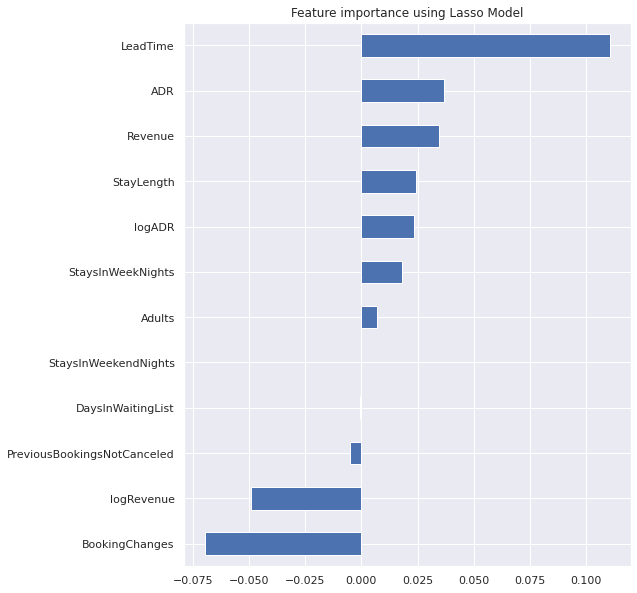

In [ ]:
plot_importance(coef,'Lasso')

### Decision Tree importances: 

In [ ]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: LeadTime             Importance: 0.2
Variable: ADR                  Importance: 0.07
Variable: Revenue              Importance: 0.07
Variable: logADR               Importance: 0.07
Variable: logRevenue           Importance: 0.07
Variable: MarketSegment_Online TA Importance: 0.07
Variable: Country_PRT          Importance: 0.06
Variable: Requests_dum         Importance: 0.04
Variable: StaysInWeekNights    Importance: 0.03
Variable: StaysInWeekendNights Importance: 0.02
Variable: Adults               Importance: 0.02
Variable: BookingChanges       Importance: 0.02
Variable: StayLength           Importance: 0.02
Variable: DepositType_Non Refund      Importance: 0.02
Variable: Prev_cancel_dum      Importance: 0.02
Variable: AssignedRoomType_D                Importance: 0.01
Variable: Country_DEU          Importance: 0.01
Variable: Country_ESP          Importance: 0.01
Variable: Country_FRA          Importance: 0.01
Variable: Country_GBR          Importance: 0.01
Variable: Country_

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

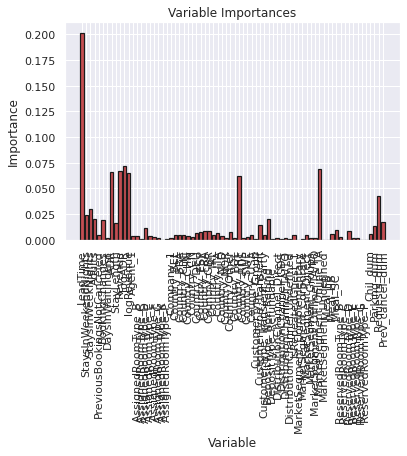

In [ ]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, X_train.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

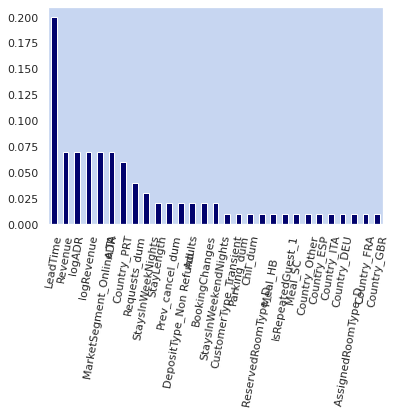

In [ ]:
dtfeatures = pd.DataFrame(feature_importances).sort_values(1, ascending=False)
ax=dtfeatures[0:29].plot.bar(color="#02036d", legend=None, rot=80)
ax.grid(b=None)
ax.set_xticklabels(dtfeatures[0][0:29])
ax.set_facecolor("#c7d6f1")#02036d


In [ ]:
dtfeatures[0][0:29]

0                              LeadTime
2                               Revenue
3                                logADR
4                            logRevenue
5               MarketSegment_Online TA
1                                   ADR
6                           Country_PRT
7                          Requests_dum
8                     StaysInWeekNights
12                           StayLength
14                      Prev_cancel_dum
13          DepositType_Non Refund     
10                               Adults
11                       BookingChanges
9                  StaysInWeekendNights
22               CustomerType_Transient
28                          Parking_dum
27                             Chil_dum
26    ReservedRoomType_D               
24                       Meal_HB       
23                    IsRepeatedGuest_1
25                       Meal_SC       
21                        Country_Other
17                          Country_ESP
20                          Country_ITA


## Final Insights:

[link text](https://)<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | Decsion Tree | Mutual Info (1%) | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |--- | --- |
| LeadTime | Keep | Discard | Keep | Keep | Keep | Keep |
| StaysInWeekendNights | Discard | Discard | Discard |Keep |Discard| Discard |
| StaysInWeekNights | Discard | Keep | Discard | Keep |Discard| Discard |
| Adults | Discard | Keep | Discard | Keep |Discard| Discard |
| Children | Discard | Keep | Discard | Keep |Discard| Discard |
| Babies | Discard | Discard | Discard | Discard |Discard| Discard |
| PreviousCancellations | Keep | Keep | Keep |  Keep |Discard| Keep |
| PreviousBookingsNotCanceled | Discard | Keep | Keep | Discard |Discard|  Discard |
| BookingChanges | Keep | Keep | Keep | Keep | Keep |  Keep |
| DaysInWaitingList | Discard | Discard | Keep | Keep |Discard|  Try with and without |
| ADR | Discard | Discard | Keep | Keep | Keep |  Keep |
| RequiredCarParkingSpaces | Discard | Keep | Discard | Keep |Discard|  Try with and without |
| TotalOfSpecialRequests | Keep | Keep | Keep | Keep |Discard|  Keep |
| StayLength | Discard | Discard | Discard | Keep |Keep |  Discard |
| Revenue | Discard | Discard | Keep | Keep | Keep | Keep  |
| logADR | Discard | Keep | Discard | Keep | Keep |  Ranked lower than ADR |
| logRevenue | Discard | Keep | Discard | Keep | Keep |  Ranked lower than Revenue |


<hr>


### Categorical Data

| Predictor | Chi-Square | Mutual Info (1%) |DTree | What to do?|  
| --- | --- | --- | ---| ---|
| Agent | Keep |Keep|Discard  | Keep |
| AssignedRoomType | Keep |Discard|Keep |Keep |
| Country | Keep|Keep|Keep|Keep
| Company | Keep | Discard|Discard| Discard|
| CustomerType | Keep |Keep |Keep|Keep|
| DepositType | Keep |Keep |Keep|Keep|
| DistributionChannel | Keep | Keep  |Discard|Keep |
| MarketSegment | Keep |Keep |Keep|Keep|
| IsRepeatedGuest | Keep |Discard |Discard|Discard|
| Meal | Keep | Discard|Keep|Keep|
| ReservedRoomType | Keep | Discard|Keep|Keep|
| Parking_dum | Keep |  Keep |Keep|Keep|
| Requests_dum | Keep |  Keep |Keep|Keep|
| Child_dum | Keep | Discard |Keep|Keep|
| Prev_cancel_dum | Keep | Discard |Keep|Keep|

<hr>


In [ ]:
'''other considerations for ML algorithm
unbalanced balanced (30%)'''

'other considerations for ML algorithm\nunbalanced balanced (30%)'

In [ ]:
#so final lists of features: 
metric_features = ['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'BookingChanges', 'DaysInWaitingList', 'ADR','Revenue', "StayLength"]
non_metric_features = ['Agent',  'AssignedRoomType',  'Country',  'CustomerType',  'DepositType',  'DistributionChannel', 'MarketSegment',  'Meal','ReservedRoomType']
#['Chil_dum',  'Parking_dum',  'Requests_dum',  'Prev_cancel_dum']]
#["IsCanceled"]

In [ ]:
#Create the encoder
encoder = OneHotEncoder(sparse=False, drop="first")
#Fit the encoder to the train
df_final_cat=encoder.fit_transform(df[non_metric_features])
df_final_cat_names = encoder.get_feature_names()
df_final_cat = pd.DataFrame(df_final_cat, index=df.index, columns=df_final_cat_names)  
df_final_cat

x0_1  x1_B                 x1_C                 x1_D                 \
61718   0.0                  0.0                  0.0                  1.0   
4551    1.0                  0.0                  0.0                  0.0   
61588   1.0                  0.0                  0.0                  0.0   
3191    1.0                  1.0                  0.0                  0.0   
63999   0.0                  0.0                  0.0                  0.0   
...     ...                  ...                  ...                  ...   
12036   0.0                  0.0                  0.0                  0.0   
62565   1.0                  0.0                  0.0                  0.0   
53176   1.0                  0.0                  0.0                  0.0   
21332   1.0                  0.0                  0.0                  0.0   
59418   1.0                  0.0                  0.0                  0.0   

       x1_E                 x1_F                 x1_G                 \
61718                  0.0                  0.0                  0.0   
4551                   0.0                  0.0                  0.0   
61588                  0.0                  0.0                  0.0   
3191                   0.0                  0.0                  0.0   
63999                  0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
12036                  0.0                  0.0                  0.0   
62565                  0.0                  1.0                  0.0   
53176                  0.0                  0.0                  0.0   
21332                  0.0                  0.0                  0.0   
59418                  0.0                  0.0                  0.0   

       x1_K                 x1_P                 x2_BEL  x2_BRA  x2_CHE  \
61718                  0.0                  0.0     0.0     0.0     0.0   
4551                   0.0                  0.0     0.0     0.0     0.0   
61588                  1.0                  0.0     0.0     0.0     0.0   
3191                   0.0                  0.0     0.0     0.0     0.0   
63999                  0.0                  0.0     0.0     0.0     0.0   
...                    ...                  ...     ...     ...     ...   
12036                  0.0                  0.0     0.0     0.0     0.0   
62565                  0.0                  0.0     0.0     0.0     0.0   
53176                  0.0                  0.0     0.0     0.0     0.0   
21332                  0.0                  0.0     0.0     0.0     0.0   
59418                  0.0                  0.0     0.0     0.0     0.0   

       x2_CHN  x2_CN  x2_DEU  x2_ESP  x2_FRA  x2_GBR  x2_IRL  x2_ITA  x2_NLD  \
61718     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4551      0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
61588     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3191      0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
63999     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
12036     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
62565     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
53176     0.0    0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
21332     0.0    0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
59418     0.0    0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   

       x2_NOR  x2_Other  x2_POL  x2_PRT  x2_RUS  x2_SWE  x2_USA  x3_Group  \
61718     0.0       1.0     0.0     0.0     0.0     0.0     0.0       0.0   
4551      0.0       0.0     0.0     1.0     0.0     0.0     0.0       0.0   
61588     0.0       1.0     0.0     0.0     0.0     0.0     0.0       0.0   
3191      0.0       0.0     0.0    

In [ ]:
df_final = pd.concat([df[metric_features].round(2),df["ArrivalDate"],df_final_cat,df[['Chil_dum',  'Parking_dum',  'Requests_dum',  'Prev_cancel_dum']],df["IsCanceled"]],axis=1)
df_final

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  \
61718     -0.42                   0.0                0.5    -1.0   
4551       0.09                   0.5                0.5     0.0   
61588      0.05                  -0.5               -0.5     0.0   
3191       0.06                  -0.5                0.0     0.0   
63999     -0.48                   0.0                0.0    -1.0   
...         ...                   ...                ...     ...   
12036     -0.38                   0.0                0.5    -1.0   
62565     -0.46                  -0.5                0.0     0.0   
53176      0.15                   0.0               -1.0    -1.0   
21332      0.50                  -0.5                0.0     0.0   
59418      1.38                   0.5                1.0     0.0   

       BookingChanges  DaysInWaitingList   ADR  Revenue  StayLength  \
61718             0.0                0.0 -0.09     0.38         0.5   
4551              0.0                0.0 -0.32     0.54         1.0   
61588             1.0                0.0 -0.05    -0.71        -1.0   
3191              0.0                0.0 -0.47    -0.48        -0.5   
63999             0.0                0.0  0.09     0.11         0.0   
...               ...                ...   ...      ...         ...   
12036             0.0                0.0  0.32     0.68         0.5   
62565             0.0                0.0  0.74    -0.05        -0.5   
53176             0.0                0.0 -0.72    -0.83        -1.0   
21332             0.0                0.0  0.09    -0.28        -0.5   
59418             0.0                0.0  0.01     1.22         1.5   

      ArrivalDate  x0_1  x1_B                 x1_C                 \
61718  2016-11-14   0.0                  0.0                  0.0   
4551   2015-10-08   1.0                  0.0                  0.0   
61588  2016-11-15   1.0                  0.0                  0.0   
3191   2015-09-17   1.0                  1.0                  0.0   
63999  2017-01-02   0.0                  0.0                  0.0   
...           ...   ...                  ...                  ...   
12036  2016-05-30   0.0                  0.0                  0.0   
62565  2016-12-01   1.0                  0.0                  0.0   
53176  2016-07-18   1.0                  0.0                  0.0   
21332  2016-12-09   1.0                  0.0                  0.0   
59418  2016-10-08   1.0                  0.0                  0.0   

       x1_D                 x1_E                 x1_F                 \
61718                  1.0                  0.0                  0.0   
4551                   0.0                  0.0                  0.0   
61588                  0.0                  0.0                  0.0   
3191                   0.0                  0.0                  0.0   
63999                  0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
12036                  0.0                  0.0                  0.0   
62565                  0.0                  0.0                  1.0   
53176                  0.0                  0.0                  0.0   
21332                  0.0                  0.0                  0.0   
59418                  0.0                  0.0                  0.0   

       x1_G                 x1_K                 x1_P                 x2_BEL  \
61718                  0.0                  0.0                  0.0     0.0   
4551                   0.0                  0.0                  0.0     0.0   
61588                  0.0                  1.0                  0.0     0.0   
3191                   0.0                  0.0                  0.0     0.0   
63999                  0.0                  0.0                  0.0     0.0   
...                    ...                  ...                  ...     ...   
12036                  0.0                  0.0                  0.0     0.0   
625

In [ ]:
from google.colab import files
df_final.to_csv('cleaned_data.csv') 
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_test = df_test_backup.copy()

#outliers
filters1 = (
    (df_test['Babies']<=5)
    &
    (df_test['ADR']<=2000)
    &
    (df_test['DaysInWaitingList']<=300)
)
df_test = df_test[filters1]

#missing data
df_test.Children.fillna(0, inplace = True)
df_test.replace('       NULL',np.nan, inplace=True)
df_test.replace('NULL',np.nan, inplace=True)
df_test['Agent'].fillna(0, inplace=True)
df_test['Company'].fillna(0, inplace=True)
df_test.loc[df_test['Agent']!=0, 'Agent'] = 1
df_test.loc[df_test['Company']!=0, 'Company'] = 1
df_test['Country'].fillna("Unknown", inplace=True)
df_test['Children'].fillna(0, inplace=True)

#data types
df_test['Children'] = df_test['Children'].astype(int)

#feature engineering
df_test["logADR"]=df_test["ADR"].map(lambda x : 1 if x<=1 else x)
df_test["logADR"]=np.log(df_test["logADR"])
df_test["logRevenue"]=df_test["Revenue"].map(lambda x : 1 if x<=1 else x)
df_test["logRevenue"]=np.log(df_test["logRevenue"])
df_test["Country"]=df_test["Country"].map(lambda x : x if x in pop_country_list else "Other")
df_test["Chil_dum"]=df_test.apply(lambda a: 1 if a["Children"]>=1 | a["Babies"]>=1 else 0 ,axis=1)
df_test["Parking_dum"]=df_test.apply(lambda a: 1 if a["RequiredCarParkingSpaces"]>=1 else 0 ,axis=1)
df_test["Requests_dum"]=df_test.apply(lambda a: 1 if a["TotalOfSpecialRequests"]>=1 else 0 ,axis=1)
df_test["Prev_cancel_dum"]=df_test.apply(lambda a: 1 if a["PreviousCancellations"]>=1 else 0 ,axis=1)

#scaling using test data
features_for_scaling = ['LeadTime',  'StaysInWeekendNights',  'StaysInWeekNights',  'Adults',  'Children',  'Babies',  'PreviousCancellations',  'PreviousBookingsNotCanceled',  'BookingChanges',  'DaysInWaitingList',
  'ADR',  'RequiredCarParkingSpaces',  'TotalOfSpecialRequests',  'StayLength',  'Revenue',  'logADR',  'logRevenue']
scaledtestfeatures = scaler.transform(df_test[features_for_scaling])
scaledtestfeatures= pd.DataFrame(scaledtestfeatures, columns = df_test[features_for_scaling].columns).set_index(df_test[features_for_scaling].index)

#Transform the test categorical
df_test_cat=encoder.transform(df_test[non_metric_features])
df_test_cat = pd.DataFrame(df_test_cat, index=df_test.index, columns=df_final_cat_names)
df_test_cat

x0_1  x1_B                 x1_C                 x1_D                 \
45113   1.0                  0.0                  0.0                  1.0   
58307   1.0                  0.0                  0.0                  0.0   
761     1.0                  0.0                  0.0                  0.0   
27623   1.0                  0.0                  0.0                  0.0   
18996   1.0                  0.0                  0.0                  0.0   
...     ...                  ...                  ...                  ...   
24505   1.0                  0.0                  0.0                  0.0   
49033   1.0                  0.0                  0.0                  0.0   
65737   0.0                  0.0                  0.0                  1.0   
43457   0.0                  0.0                  0.0                  0.0   
45978   1.0                  0.0                  0.0                  1.0   

       x1_E                 x1_F                 x1_G                 \
45113                  0.0                  0.0                  0.0   
58307                  0.0                  0.0                  0.0   
761                    0.0                  0.0                  0.0   
27623                  0.0                  0.0                  0.0   
18996                  0.0                  0.0                  0.0   
...                    ...                  ...                  ...   
24505                  0.0                  0.0                  0.0   
49033                  1.0                  0.0                  0.0   
65737                  0.0                  0.0                  0.0   
43457                  0.0                  0.0                  0.0   
45978                  0.0                  0.0                  0.0   

       x1_K                 x1_P                 x2_BEL  x2_BRA  x2_CHE  \
45113                  0.0                  0.0     0.0     0.0     0.0   
58307                  0.0                  0.0     0.0     0.0     0.0   
761                    0.0                  0.0     0.0     0.0     0.0   
27623                  0.0                  0.0     0.0     0.0     0.0   
18996                  0.0                  0.0     0.0     0.0     0.0   
...                    ...                  ...     ...     ...     ...   
24505                  0.0                  0.0     0.0     0.0     0.0   
49033                  0.0                  0.0     1.0     0.0     0.0   
65737                  0.0                  0.0     0.0     0.0     0.0   
43457                  0.0                  0.0     0.0     0.0     0.0   
45978                  0.0                  0.0     0.0     0.0     0.0   

       x2_CHN  x2_CN  x2_DEU  x2_ESP  x2_FRA  x2_GBR  x2_IRL  x2_ITA  x2_NLD  \
45113     0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
58307     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0   
761       0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
27623     0.0    0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
18996     0.0    0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
...       ...    ...     ...     ...     ...     ...     ...     ...     ...   
24505     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
49033     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
65737     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
43457     0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
45978     0.0    0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   

       x2_NOR  x2_Other  x2_POL  x2_PRT  x2_RUS  x2_SWE  x2_USA  x3_Group  \
45113     0.0       0.0     0.0     0.0     0.0     0.0     0.0       0.0   
58307     0.0       0.0     0.0     0.0     0.0     0.0     0.0       0.0   
761       0.0       0.0     0.0     1.0     0.0     0.0     0.0       0.0   
27623     0.0       0.0     0.0    

In [ ]:
# test if the same dummy variables were created
print(df_final_cat.shape)
print(df_test_cat.shape)

(37385, 54)
(16028, 54)


In [ ]:
#final variables
df_test_final = pd.concat([scaledtestfeatures[metric_features].round(2),df_test["ArrivalDate"],df_test_cat,df_test[['Chil_dum',  'Parking_dum',  'Requests_dum',  'Prev_cancel_dum']],df_test["IsCanceled"]],axis=1)

In [ ]:
df_test_final.head()

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  \
45113     -0.23                   0.0                0.5     1.0   
58307      0.04                  -0.5                0.0    -1.0   
761       -0.48                  -0.5               -0.5     0.0   
27623      1.79                   0.0               -0.5     0.0   
18996      2.18                   0.0                0.5     0.0   

       BookingChanges  DaysInWaitingList   ADR  Revenue  StayLength  \
45113             0.0                0.0  0.26     0.63         0.5   
58307             0.0                0.0 -0.54    -0.51        -0.5   
761               0.0                0.0 -0.33    -0.76        -1.0   
27623             0.0                0.0  1.09     0.08        -0.5   
18996             0.0                0.0 -0.25     0.27         0.5   

      ArrivalDate  x0_1  x1_B                 x1_C                 \
45113  2016-03-07   1.0                  0.0                  0.0   
58307  2017-03-22   1.0                  0.0                  0.0   
761    2015-08-08   1.0                  0.0                  0.0   
27623  2017-05-06   1.0                  0.0                  0.0   
18996  2016-10-20   1.0                  0.0                  0.0   

       x1_D                 x1_E                 x1_F                 \
45113                  1.0                  0.0                  0.0   
58307                  0.0                  0.0                  0.0   
761                    0.0                  0.0                  0.0   
27623                  0.0                  0.0                  0.0   
18996                  0.0                  0.0                  0.0   

       x1_G                 x1_K                 x1_P                 x2_BEL  \
45113                  0.0                  0.0                  0.0     0.0   
58307                  0.0                  0.0                  0.0     0.0   
761                    0.0                  0.0                  0.0     0.0   
27623                  0.0                  0.0                  0.0     0.0   
18996                  0.0                  0.0                  0.0     0.0   

       x2_BRA  x2_CHE  x2_CHN  x2_CN  x2_DEU  x2_ESP  x2_FRA  x2_GBR  x2_IRL  \
45113     0.0     0.0     0.0    0.0     0.0     0.0     1.0     0.0     0.0   
58307     0.0     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0   
761       0.0     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0   
27623     0.0     0.0     0.0    0.0     0.0     0.0     1.0     0.0     0.0   
18996     0.0     0.0     0.0    0.0     0.0     0.0     0.0     0.0     0.0   

       x2_ITA  x2_NLD  x2_NOR  x2_Other  x2_POL  x2_PRT  x2_RUS  x2_SWE  \
45113     0.0     0.0     0.0       0.0     0.0     0.0     0.0     0.0   
58307     0.0     1.0     0.0       0.0     0.0     0.0     0.0     0.0   
761       0.0     0.0     0.0       0.0     0.0     1.0     0.0     0.0   
27623     0.0     0.0     0.0       0.0     0.0     0.0     0.0     0.0   
18996     1.0     0.0     0.0       0.0     0.0     0.0     0.0     0.0   

       x2_USA  x3_Group  x3_Transient  x3_Transient-Party  x4_Non Refund       \
45113     0.0       0.0           1.0                 0.0                 0.0   
58307     0.0       0.0           1.0                 0.0                 0.0   
761       0.0       0.0           1.0                 0.0                 0.0   
27623     0.0       0.0           1.0                 0.0                 0.0   
18996     0.0       0.0           1.0                 0.0                 0.0   

       x4_Refundable       x5_Direct  x5_GDS  x5_TA/TO  x5_Undefined  \
45113                 0.0        0.0     0.0       1.0           0.0   
58307                 0.0        0.0     0.0       1.0           0.0   
761                   0.0        0.0     0.0       1.0           0.0   
27623                 0.0        0.0     0.0       1.0           0.0   
18996                 0.0        0.0     0.0       1.0         

In [ ]:
df_test_final.to_csv('cleaned_test_data.csv') 
files.download('cleaned_test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling

In [ ]:
df_final = pd.read_csv('cleaned_data.csv')
df_test_final=pd.read_csv('cleaned_test_data.csv')

In [ ]:
print(df_final.columns.values)

In [ ]:
#To be rechecked after one hot encoding
final_features=['LeadTime', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'Revenue', 'Agent_1','AssignedRoomType_B               ','AssignedRoomType_C               ', 
                'AssignedRoomType_D               ', 'AssignedRoomType_E               ','AssignedRoomType_G               ', 'AssignedRoomType_K               ',
                 'CustomerType_Group', 'CustomerType_Transient', 'CustomerType_Transient-Party', 'DepositType_Non Refund     ', 
'DepositType_Refundable     ', 'DistributionChannel_Direct', 'DistributionChannel_GDS', 'DistributionChannel_TA/TO', 'MarketSegment_Complementary',
'MarketSegment_Corporate', 'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Offline TA/TO', 'MarketSegment_Online TA', 'Meal_FB       ',
 'Meal_HB       ','Meal_SC       ', 'ReservedRoomType_B               ', 'ReservedRoomType_C               ', 'ReservedRoomType_D               ', 'ReservedRoomType_E               ', 
'ReservedRoomType_F               ', 'ReservedRoomType_G               ', 'Chil_dum', 
'Parking_dum', 'Requests_dum', 'Prev_cancel_dum', 'IsCanceled']

In [ ]:
metric_features=['LeadTime', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'Revenue']

In [ ]:
df_train=df_final[final_features]
df_test=df_test_final[final_features]

In [ ]:
y_train=df_train['IsCanceled']
y_test=df_test['IsCanceled']
X_train=df_train.drop('IsCanceled', axis=1)
X_test=df_test.drop('IsCanceled', axis=1)

### Robust Scaler

In [ ]:
scaler= RobustScaler().fit(X_train[metric_features])
trainscaled = scaler.transform(X_train[metric_features])
X_train[metric_features] = trainscaled
X_train.head()

LeadTime  BookingChanges  DaysInWaitingList       ADR   Revenue  \
61718 -0.423077             0.0                0.0 -0.094021  0.380145   
4551   0.086538             0.0                0.0 -0.323133  0.538587   
61588  0.048077             1.0                0.0 -0.054359 -0.706522   
3191   0.057692             0.0                0.0 -0.469096 -0.484058   
63999 -0.480769             0.0                0.0  0.087981  0.113804   

       Agent_1  AssignedRoomType_B                 \
61718        0                                  0   
4551         1                                  0   
61588        1                                  0   
3191         1                                  1   
63999        0                                  0   

       AssignedRoomType_C                 AssignedRoomType_D                 \
61718                                  0                                  1   
4551                                   0                                  0   
61588                                  0                                  0   
3191                                   0                                  0   
63999                                  0                                  0   

       AssignedRoomType_E                 AssignedRoomType_G                 \
61718                                  0                                  0   
4551                                   0                                  0   
61588                                  0                                  0   
3191                                   0                                  0   
63999                                  0                                  0   

       AssignedRoomType_K                 CustomerType_Group  \
61718                                  0                   0   
4551                                   0                   0   
61588                                  1                   0   
3191                                   0                   0   
63999                                  0                   0   

       CustomerType_Transient  CustomerType_Transient-Party  \
61718                       1                             0   
4551                        0                             0   
61588                       1                             0   
3191                        0                             1   
63999                       1                             0   

       DepositType_Non Refund       DepositType_Refundable       \
61718                            0                            0   
4551                             0                            0   
61588                            0                            0   
3191                             0                            0   
63999                            0                            0   

       DistributionChannel_Direct  DistributionChannel_GDS  \
61718                           0                        0   
4551                            0                        0   
61588                           0                        0   
3191                            0                        0   
63999                           1                        0   

       DistributionChannel_TA/TO  MarketSegment_Complementary  \
61718                          0                            0   
4551                           1                            0   
61588                          1                            0   
3191                           1                            0   
63999                          0                            0   

       MarketSegment_Corporate  MarketSegment_Direct  MarketSegment_Groups  \
61718                        1                     0                     0   
4551                         0                     0                     0   
61588                        0                     0                     0   
3191                         0                    

In [ ]:
#Scale test data
testscaled = scaler.transform(X_test[metric_features])
X_test[metric_features] = testscaled
X_test.head()

LeadTime  BookingChanges  DaysInWaitingList       ADR   Revenue  \
45113 -0.230769             0.0                0.0  0.255688  0.631884   
58307  0.038462             0.0                0.0 -0.543386 -0.510797   
761   -0.480769             0.0                0.0 -0.328166 -0.755797   
27623  1.788462             0.0                0.0  1.093215  0.078261   
18996  2.182692             0.0                0.0 -0.246024  0.270725   

       Agent_1  AssignedRoomType_B                 \
45113        1                                  0   
58307        1                                  0   
761          1                                  0   
27623        1                                  0   
18996        1                                  0   

       AssignedRoomType_C                 AssignedRoomType_D                 \
45113                                  0                                  1   
58307                                  0                                  0   
761                                    0                                  0   
27623                                  0                                  0   
18996                                  0                                  0   

       AssignedRoomType_E                 AssignedRoomType_G                 \
45113                                  0                                  0   
58307                                  0                                  0   
761                                    0                                  0   
27623                                  0                                  0   
18996                                  0                                  0   

       AssignedRoomType_K                 CustomerType_Group  \
45113                                  0                   0   
58307                                  0                   0   
761                                    0                   0   
27623                                  0                   0   
18996                                  0                   0   

       CustomerType_Transient  CustomerType_Transient-Party  \
45113                       1                             0   
58307                       1                             0   
761                         1                             0   
27623                       1                             0   
18996                       1                             0   

       DepositType_Non Refund       DepositType_Refundable       \
45113                            0                            0   
58307                            0                            0   
761                              0                            0   
27623                            0                            0   
18996                            0                            0   

       DistributionChannel_Direct  DistributionChannel_GDS  \
45113                           0                        0   
58307                           0                        0   
761                             0                        0   
27623                           0                        0   
18996                           0                        0   

       DistributionChannel_TA/TO  MarketSegment_Complementary  \
45113                          1                            0   
58307                          1                            0   
761                            1                            0   
27623                          1                            0   
18996                          1                            0   

       MarketSegment_Corporate  MarketSegment_Direct  MarketSegment_Groups  \
45113                        0                     0                     0   
58307                        0                     0                     0   
761                          0                     0                     0   
27623                        0                    

### Model Assessment functions: 

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Test states')
    plt.xlabel('Predicted states')
    plt.tight_layout()

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    """
    Function that pritns the classification report and the confusion matrix of the train and validation dataset
    """
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                TEST                                                       ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

## K-nearest neighbor

In [ ]:
error_rate = []

for i in range(1,20):
    
    modelKNN = KNeighborsClassifier(n_neighbors=i)
    modelKNN.fit(X_train,y_train)
    pred_i = modelKNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

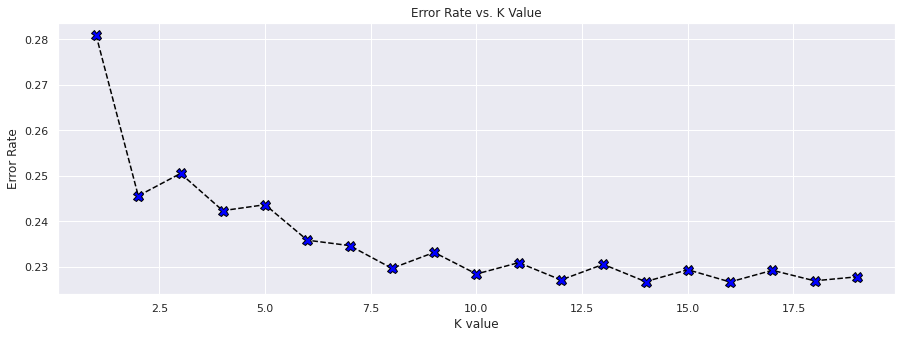

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,20),error_rate,color='black', linestyle='dashed', marker='X',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [ ]:
#Parameter tuning with GridSearchCV 
modelKNN = KNeighborsClassifier()

# Algorithm
algorithm = ['auto', 'brute','kd_tree']
# number of neighbors
n_neighbors = [10,12,14,18]
# Leaf size
leaf_size= [20,30,40,1]
#P
p= [ 1,2]
#Weights
weights= ['uniform', 'distance']
#Metric
metric=['minkowski', 'euclidean', 'manhattan']



# Create the random grid
knn_grid_par = {'algorithm': algorithm,
               'n_neighbors': n_neighbors,
               'leaf_size': leaf_size,
               'p':p,
               'weights': weights,
               'metric': metric
               }
pprint(knn_grid_par)

{'algorithm': ['auto', 'brute', 'kd_tree'],
 'leaf_size': [20, 30, 40, 1],
 'metric': ['minkowski', 'euclidean', 'manhattan'],
 'n_neighbors': [10, 12, 14, 18],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}


In [ ]:
knn_grid = GridSearchCV(estimator = modelKNN,
                          param_grid=knn_grid_par, 
                          scoring = 'f1',
                          cv = 5, verbose=2, n_jobs = -1
                         )
# Fit the random search model
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


In [ ]:
#Get best param: 
knn_grid.best_params_